**Filipino Family Income and Expenditure**

Justin Chua, Melody Go, John Legaspi, Francine Sia, Sean Yuhico

Our Data Science Project focuses on analyzing the income and expenditure of Filipino Families. In this project we aim to answer the following questions
1. General Question: Is the general household income in the Philippines enough to support a normal lifestyle? 

2. Specific Question - Exploratory: What are the major sources of income that are prominent in each region? 
3. Specific Question - Exploratory: Which regions have the families with the highest incomes?
4. Specific Question - Exploratory: Which regions have the families with the most expenses?
5. Specific Question - Exploratory: Which major source of income provides the best for the expenses of a family?

In order to answer the above mentioned questions, we used the Filipino Family Income and Expenditure dataset from kaggle with can be found through this link 
https://www.kaggle.com/grosvenpaul/family-income-and-expenditure 


To start, we imported the neccessary libraries such as os, math, pandas, numpy, matplotlib, seaborn and scipy

In [ ]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

%pylab inline

Populating the interactive namespace from numpy and matplotlib


We used Google Colab for this project in order to work collaboratively, so we imported drive and used the mount function to retrieve our files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data = pd.read_csv('/content/Family Income and Expenditure.csv', error_bad_lines=False)
data = pd.read_csv('/content/drive/MyDrive/Family Income and Expenditure.csv', error_bad_lines=False)

data.head()

Total Household Income  ... Number of Motorcycle/Tricycle
0                  480332  ...                             1
1                  198235  ...                             2
2                   82785  ...                             0
3                  107589  ...                             0
4                  189322  ...                             1

[5 rows x 60 columns]

# Exploratory Data Analysis

In this section, we will do the following:

1. Examine the size and structure of the data
2. Examine each field individually
3. Examine relationships/correlations
4. Identify anomalies/outliers

## Individual Variables

We first examined the variable individually to see their structure and remove outliers if there are any.

### Total Household Income (Annual)

We made a new variable, `total_income_thousands`,  from the total household income divided by 1000,  to have a better representation.
We made use of a displot called `total_income_plot` having the count or the number of families as y and the total_income_thousands as x, to be able to visualize the annual income of all the families.

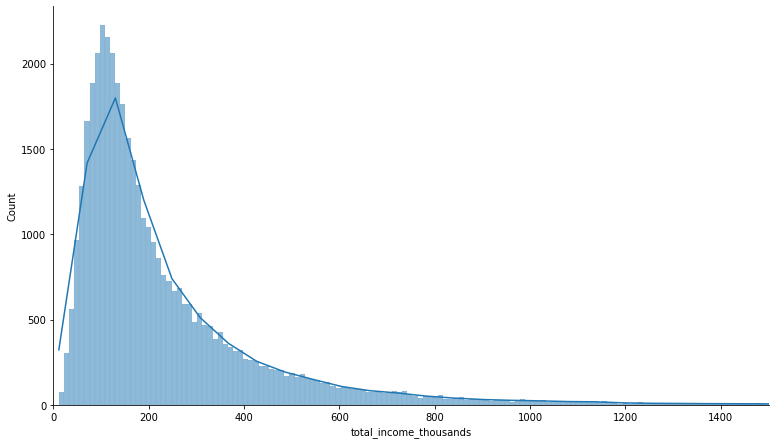

In [ ]:
data['total_income_thousands'] = data['Total Household Income']/1000
total_income_plot = sns.displot(data=data, x="total_income_thousands", kde=True)
total_income_plot.set(xlim=(0, 1500))
total_income_plot.fig.set_size_inches(12.5, 6.5)


The graph shows that majority of the families' annual income lies between 100 and 200 thousand, however, we can also see that there are
families that earns much more based on the graph.

A new column is also created called the `Income Classificaton`, the values are 
'Poor', 'Low Income', 'Lower Middle Income', 'Middle Middle class', 'Upper Middle Income', 'Upper Income', 'Rich' and it is based on the total household income. The total household income is divided into 12 to see the families' monthly income. The range of value for each
classification was based from a study by the Philippine Institute for Development Studies.

Sources:

https://news.abs-cbn.com/news/09/17/20/who-are-identified-rich-poor-govt-shows-income-class-brackets-in-ph

https://pidswebs.pids.gov.ph/CDN/PUBLICATIONS/pidsdps2022.pdf



In [ ]:
# create a list of our conditions
conditions = [
    (data['Total Household Income']/12 < 10957),
    (data['Total Household Income']/12 >= 10957) & (data['Total Household Income']/12 < 21914),
    (data['Total Household Income']/12 >= 21914 ) & (data['Total Household Income']/12 < 43828),
    (data['Total Household Income']/12 >= 43828 ) & (data['Total Household Income']/12 < 76699),
    (data['Total Household Income']/12 >= 76699 ) & (data['Total Household Income']/12 < 131484),
    (data['Total Household Income']/12 >= 131483 ) & (data['Total Household Income']/12 < 219140),
    (data['Total Household Income']/12 >= 219140)
    ]

# create a list of the values we want to assign for each condition
values = ['Poor', 'Low Income', 'Lower Middle Income', 'Middle Middle class', 'Upper Middle Income', 'Upper Income', 'Rich']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Income Classification'] = np.select(conditions, values)

# display updated DataFrame
data.head()

Total Household Income Region  ...  total_income_thousands Income Classification
0                  480332    CAR  ...                 480.332   Lower Middle Income
1                  198235    CAR  ...                 198.235            Low Income
2                   82785    CAR  ...                  82.785                  Poor
3                  107589    CAR  ...                 107.589                  Poor
4                  189322    CAR  ...                 189.322            Low Income

[5 rows x 62 columns]

We made a displot called `categorized_income_plot` having x as the count or the number of families and y as the income classification.

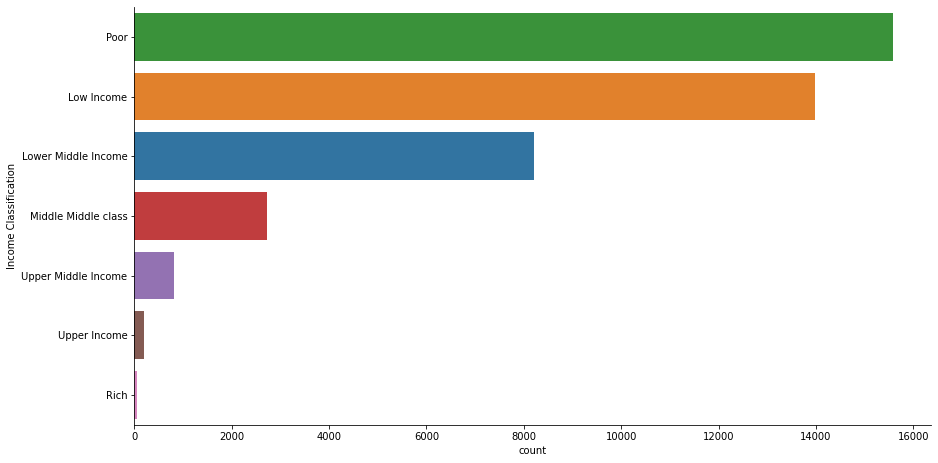

In [ ]:
categorized_income_plot = sns.catplot(data=data, y="Income Classification",kind = 'count', hue="Income Classification", order = ['Poor', 'Low Income', 'Lower Middle Income', 'Middle Middle class', 'Upper Middle Income', 'Upper Income', 'Rich'], dodge = False)
categorized_income_plot.fig.set_size_inches(30.5, 6.5)
categorized_income_plot._legend.remove()

The graph shows that as the classification increases in their monthly income, the number of families decreases.  


### Region

We made a column per region corresponding to the number of families within that region.

In [ ]:
regions = data["Region"].value_counts().rename_axis('Region').reset_index(name='counts')
# regions = regions.nlargest(10, 'counts')
regions

Region  counts
0            IVA - CALABARZON    4162
1                         NCR    4130
2         III - Central Luzon    3237
3        VI - Western Visayas    2851
4       VII - Central Visayas    2541
5            V - Bicol Region    2472
6           XI - Davao Region    2446
7           I - Ilocos Region    2348
8      VIII - Eastern Visayas    2337
9                        ARMM    2248
10        II - Cagayan Valley    2219
11         XII - SOCCSKSARGEN    2122
12      X - Northern Mindanao    1887
13  IX - Zasmboanga Peninsula    1788
14                     Caraga    1782
15                        CAR    1725
16             IVB - MIMAROPA    1249

To be able to visualize the data better we made use of a catplot, `region_plot` that shows all the regions (y)  and the number of families per region (x).

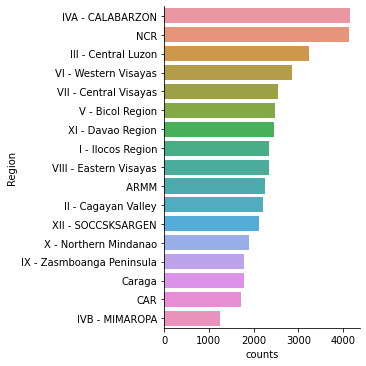

In [ ]:
region_plot = sns.catplot(y="Region", x="counts", orient="h", kind="bar", data=regions)

The graph shows that CALABARZON and NCR are almost tied having the largest number of families from the data and MIMAROPA having the least number of families.

### Main Source of Income


A new variable called `source_of_income` was created to have the number of families per `Main source of Income`. We made use of a catplot, `main_source_of_income_plot`, to be able to visualize the data. The y represents the 'Main source of Income' and x as the number of families.


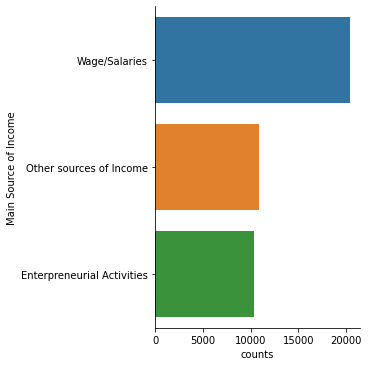

In [ ]:
source_of_income = data["Main Source of Income"].value_counts().rename_axis('Main Source of Income').reset_index(name='counts')
source_of_income = source_of_income.nlargest(10, 'counts')

main_source_of_income_plot = sns.catplot(y="Main Source of Income", x="counts", orient="h", kind="bar", data=source_of_income)

The graph shows that most families' main source of income is from wage or salaries while families that rely on entreprenurial activities and other sources of income are almost half the number. 

### Household Head Sex

A catplot called `household_head_sex_plot` was also made to be able to visualize the gender of the head in the household per family.

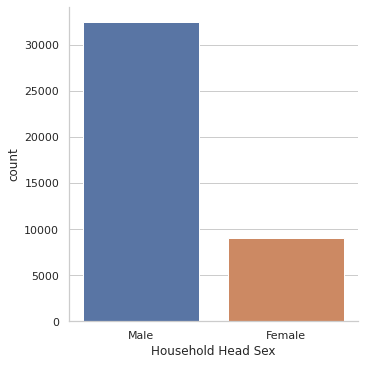

In [ ]:
sns.set_theme(style="whitegrid")

household_head_sex_plot = sns.catplot(x="Household Head Sex", kind="count", order=["Male", "Female"], data=data)

The graph shows that majority of the head in the household is Male. 

### Household Head Age

We made use of a catplot, `age_plot`, to be able to visualize the Household Head Age as the x and the number of families as y.

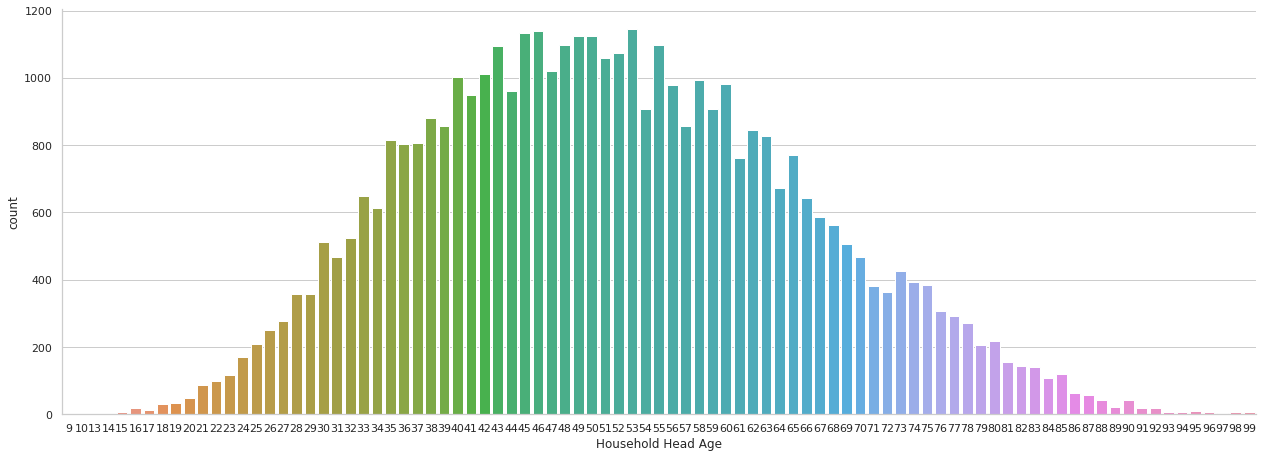

In [ ]:
age_plot = sns.catplot(x="Household Head Age", kind="count", data=data)

age_plot.fig.set_size_inches(20.5, 6.5)

In [ ]:
data["Household Head Age"].value_counts()

53    1146
46    1140
45    1133
50    1123
49    1123
      ... 
97       3
13       2
9        1
10       1
14       1
Name: Household Head Age, Length: 89, dtype: int64

The graph shows that most of the household head are around 40 to 50 years old.

### Household Head Marital Status

We made use of a catplot called `household_head_status_plot` to be able to visualize the Household Head Marital Status as the x and the number of families as y.

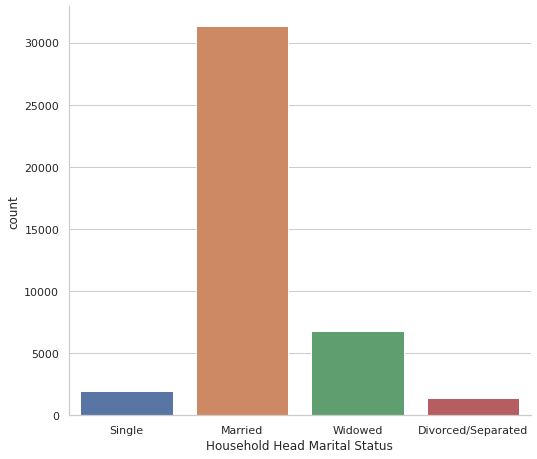

In [ ]:
sns.set_theme(style="whitegrid")

household_head_status_plot = sns.catplot(x="Household Head Marital Status", kind="count", order=["Single", "Married", "Widowed", "Divorced/Separated"], data=data)
household_head_status_plot.fig.set_size_inches(8.5, 6.5)

The graph shows that majority of the household head are married while there are a few that are single and separated.

### Household Head Highest Grade Completed 

A new variable is created called `highest_grade_completed` that shows the Household Head Highest Grade Completed and its corresponding number of families.


In [ ]:
highest_grade_completed = data["Household Head Highest Grade Completed"].value_counts().rename_axis('Household Head Highest Grade Completed').reset_index(name='counts')
highest_grade_completed = highest_grade_completed.nlargest(10, 'counts')
highest_grade_completed

Household Head Highest Grade Completed  counts
0                   High School Graduate    9628
1                    Elementary Graduate    7640
2                                Grade 4    2282
3                                Grade 5    2123
4                Second Year High School    2104
5                                Grade 3    1994
6                 Third Year High School    1545
7   Business and Administration Programs    1344
8                    Second Year College    1343
9                                Grade 2    1311

We made us of a catplot called the `highest_grade_completed_plot` to be able to see the number of household head (x) per category (y).


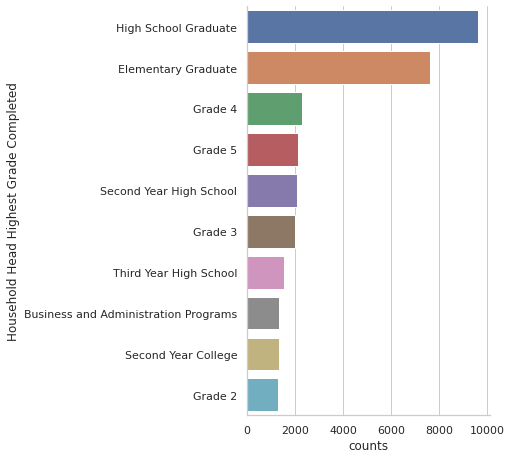

In [ ]:
highest_grade_completed_plot = sns.catplot(y="Household Head Highest Grade Completed", x="counts", orient="h", kind="bar", data=highest_grade_completed)

highest_grade_completed_plot.fig.set_size_inches(12.5, 6.5)

The graph shows that most of the household heads are Highschool Graduates followed by Elementary Graduate and the least number is completing until Grade 2.

### Household Head Job or Business Indicator

We made a bar chart called `household_head_job_indicator_plot` to see the number of household head (x) that has jobs or business and that do not (y).

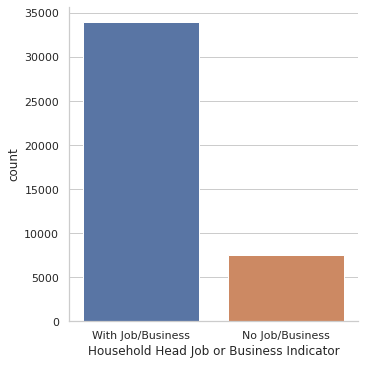

In [ ]:
sns.set_theme(style="whitegrid")

household_head_job_indicator_plot = sns.catplot(x="Household Head Job or Business Indicator", kind="count", order=["With Job/Business", "No Job/Business"], data=data)

The graph shows that majority of the household head are either with job or business.

### Household Head Occupation

Here, a new variable called `head_occupation` was created to see the highest count there is a an occupation. Only the top 10 highest job count were showed in the table.

In [ ]:
head_occupation = data["Household Head Occupation"].value_counts().rename_axis('Household Head Occupation').reset_index(name='counts')
head_occupation = head_occupation.nlargest(10, 'counts')
head_occupation

Household Head Occupation  counts
0                             Farmhands and laborers    3478
1                                       Rice farmers    2849
2  General managers/managing proprietors in whole...    2028
3  General managers/managing proprietors in trans...    1932
4                                       Corn farmers    1724
5                                    Coconut farmers    1036
6                     Building construction laborers    1014
7                Inland and coastal waters fishermen    1011
8                             Carpenters and joiners    1000
9                          Car, taxi and van drivers     824

 We created a catplot for `head_occupation` as a way to better visualize and see the count for each household head occupation.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


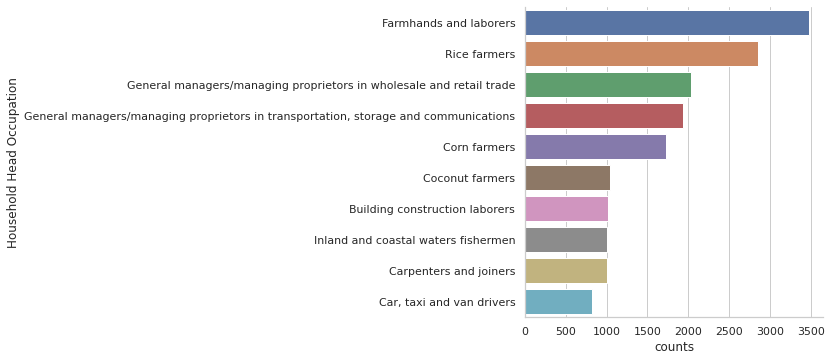

In [ ]:
head_occupation_plot = sns.catplot(y="Household Head Occupation", x="counts", orient="h", kind="bar", data=head_occupation)


Based on the graph, most of the families' household head's occupation were farmhands and laborers and the 2nd highest occupation count are rice farmers.

### Household Head Class of Worker

A new variable is created called `head_class` that shows the Household Head Class of Worker and its corresponding count. The graph is ordered in a descending order.

In [ ]:
head_class = data["Household Head Class of Worker"].value_counts().rename_axis('Household Head Class of Worker').reset_index(name='counts')
# head_class = head_class.nlargest(10, 'counts')
head_class

Household Head Class of Worker  counts
0                  Self-employed wihout any employee   13766
1                   Worked for private establishment   13731
2       Worked for government/government corporation    2820
3   Employer in own family-operated farm or business    2581
4                       Worked for private household     811
5  Worked without pay in own family-operated farm...     285
6  Worked with pay in own family-operated farm or...      14

We made a bar chart called `head_class_of_worker_plot` to see the count of the workers (x) and the categories for the class of worker (y).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


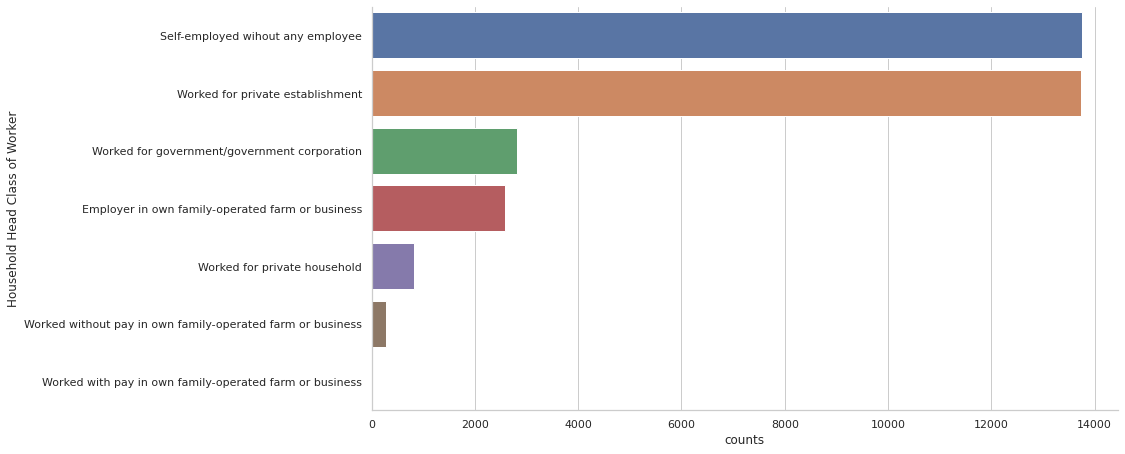

In [ ]:
head_class_of_worker_plot = sns.catplot(y="Household Head Class of Worker", x="counts", orient="h", kind="bar", data=head_class)

head_class_of_worker_plot.fig.set_size_inches(12.5, 6.5)
# head_class_of_worker_plot.tight_layout() 

The categories 'Self-employed without any employee' and 'Worked for private establishment' are almost tied having the most count of workers in the category. The least number are the ones who "Worked with pay in own family-operated farm or business'.

### Type of Household

This graph `household_type_plot` shows the count of families for a specific household type. Most of the families have a 'Single Family' household type.

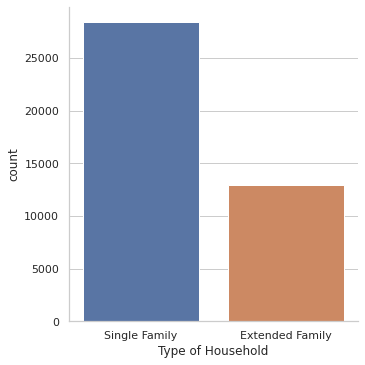

In [ ]:
sns.set_theme(style="whitegrid")

household_type_plot = sns.catplot(x="Type of Household", kind="count", order=["Single Family", "Extended Family"], data=data)

### Total Number of Family Members

The catplot `num_family_members_plot` shows the number of family members in one household. Most families only have 4 people in their household and the 2nd highest are a family of 5. The highest family member count are the ones that consist of 26 family members.

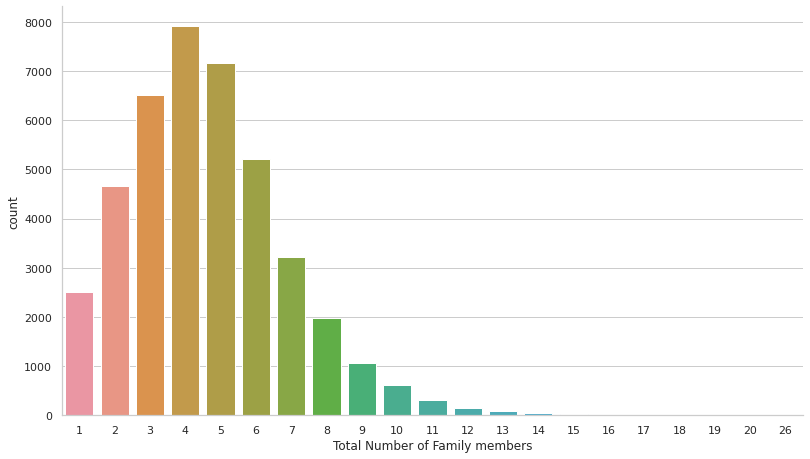

In [ ]:
num_family_members_plot = sns.catplot(x="Total Number of Family members", kind="count", data=data)

num_family_members_plot.fig.set_size_inches(12.5, 6.5)

### Members with age less than 5 year old

The catplot `age_lessthan5_plot` shows the number of families who have a family member whose age is less than 5 years old. Most families don't have a child less than 5 years old in their family.

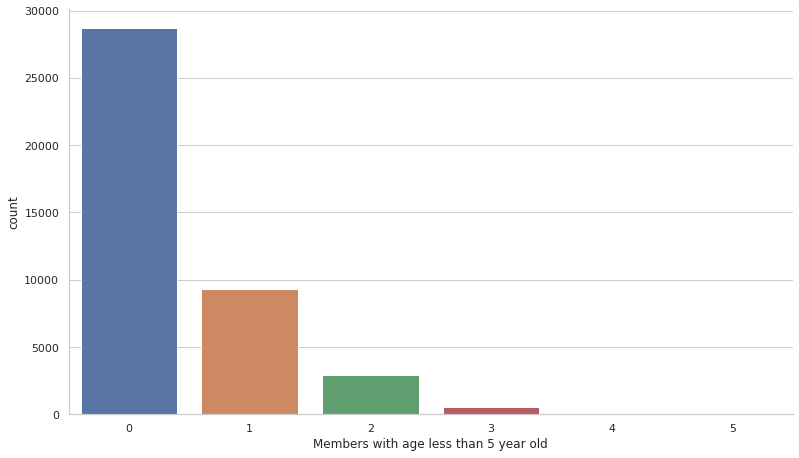

In [ ]:
age_lessthan5_plot = sns.catplot(x="Members with age less than 5 year old", kind="count", data=data)

age_lessthan5_plot.fig.set_size_inches(12.5, 6.5)

### Members with age 5 - 17 years old

The catplot `age_5to17_plot` shows the number of families who have a family member whose age is between 5 years old and 17 years old. Most families don't have a family member whose age is between 5 to 17 years old. 

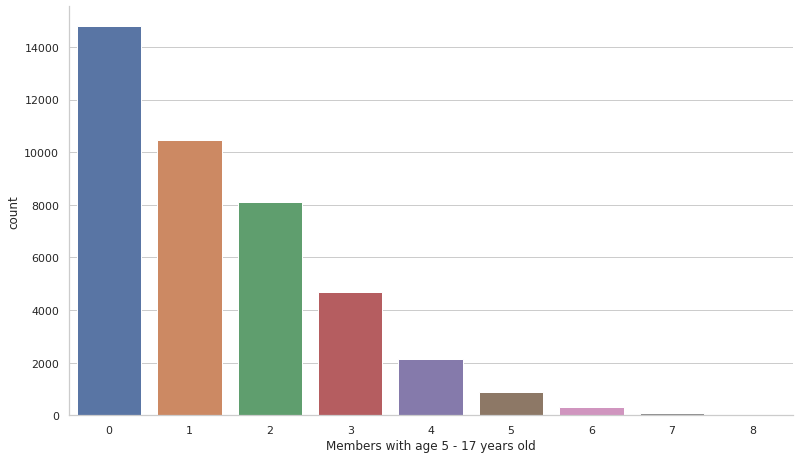

In [ ]:
age_5to17_plot = sns.catplot(x="Members with age 5 - 17 years old", kind="count", data=data)

age_5to17_plot.fig.set_size_inches(12.5, 6.5)


### Total number of family members employed

The catplot `num_employed_members_plot` shows the number of family members who are employed. Most of the families only have 1 family member who is employed and the 2nd highest count don't have a family member who is employed.


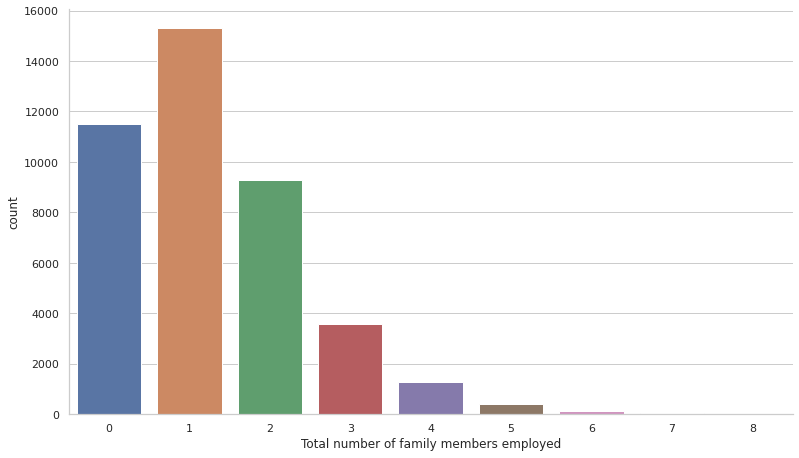

In [ ]:
num_employed_members_plot = sns.catplot(x="Total number of family members employed", kind="count", data=data)

num_employed_members_plot.fig.set_size_inches(12.5, 6.5)

### Tenure Status

A new variable `tenure_status` shows the count for each tenure status there is.

In [ ]:
tenure_status = data["Tenure Status"].value_counts().rename_axis('Tenure Status').reset_index(name='counts')
# head_class = head_class.nlargest(10, 'counts')
tenure_status

Tenure Status  counts
0      Own or owner-like possession of house and lot   29541
1     Own house, rent-free lot with consent of owner    6165
2                      Rent house/room including lot    2203
3      Rent-free house and lot with consent of owner    2014
4  Own house, rent-free lot without consent of owner     995
5                                Own house, rent lot     425
6   Rent-free house and lot without consent of owner     128
7                                     Not Applicable      73

The catplot `tenure_status_plot`was created to visualize the data.

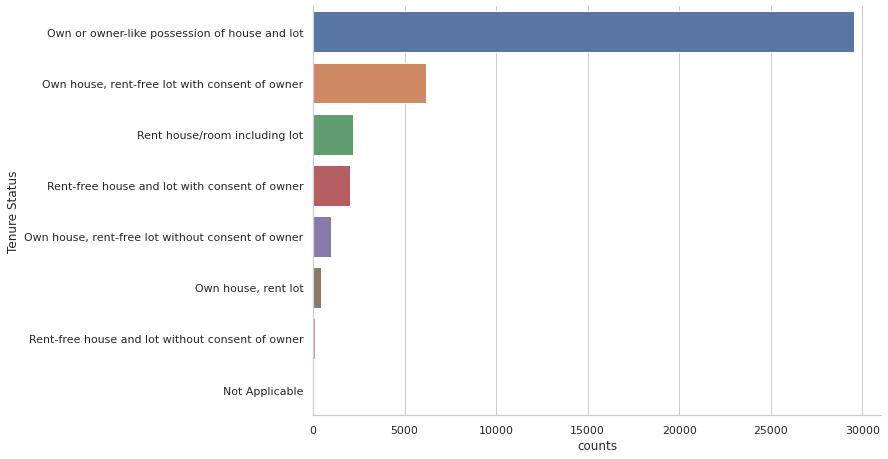

In [ ]:
tenure_status_plot = sns.catplot(y="Tenure Status", x="counts", orient="h", kind="bar", data=tenure_status)

tenure_status_plot.fig.set_size_inches(75.5, 6.5)

Most of the families has a tenure status of 'Own or owner-like possession of house and lot'.

## Relationships/Correlations 

### Source of Income and Region

The plot `sourceIncome_region_plot` was created to be able to see the relationship of the main source of income with the regions.

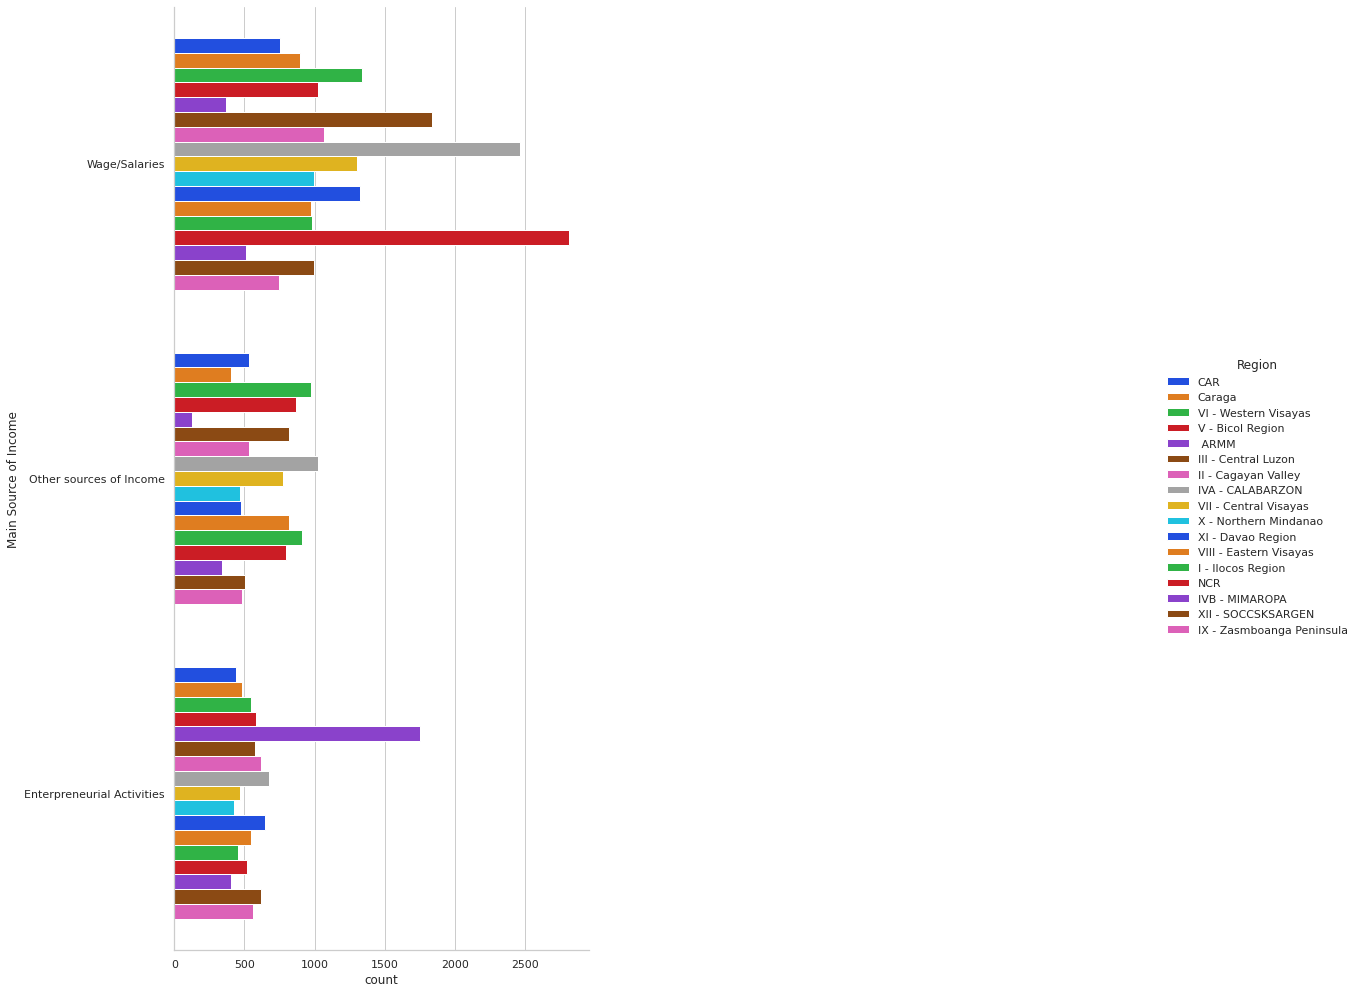

In [ ]:
sourceIncome_region_plot = sns.catplot(y="Main Source of Income",
                                  data= data[data["Main Source of Income"].isin(source_of_income["Main Source of Income"]) & data["Region"].isin(regions["Region"])],
                                  kind="count",
                                  palette = "bright",
                                  hue="Region")
sourceIncome_region_plot.fig.set_size_inches(30, 15)

For the families whose main source of income is from 'Wage/Salaries', most of them are from the NCR region. The second highest region who earns from wage/salaries are from IVA - CALABARZON.

The VI - Western Visayas and IVA - Calabarzon regions have the most families whose main source of income is from 'Other sources of income'.

For the families whose main source of income are from 'Entrepreneurial Activities', it can be seen that the ARMM region has the most families who earn from this income category.

### Job and Region



The catplot `job_region_plot` shows the number of household heads per region whose jobs are part of the top 10 highest occupations. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


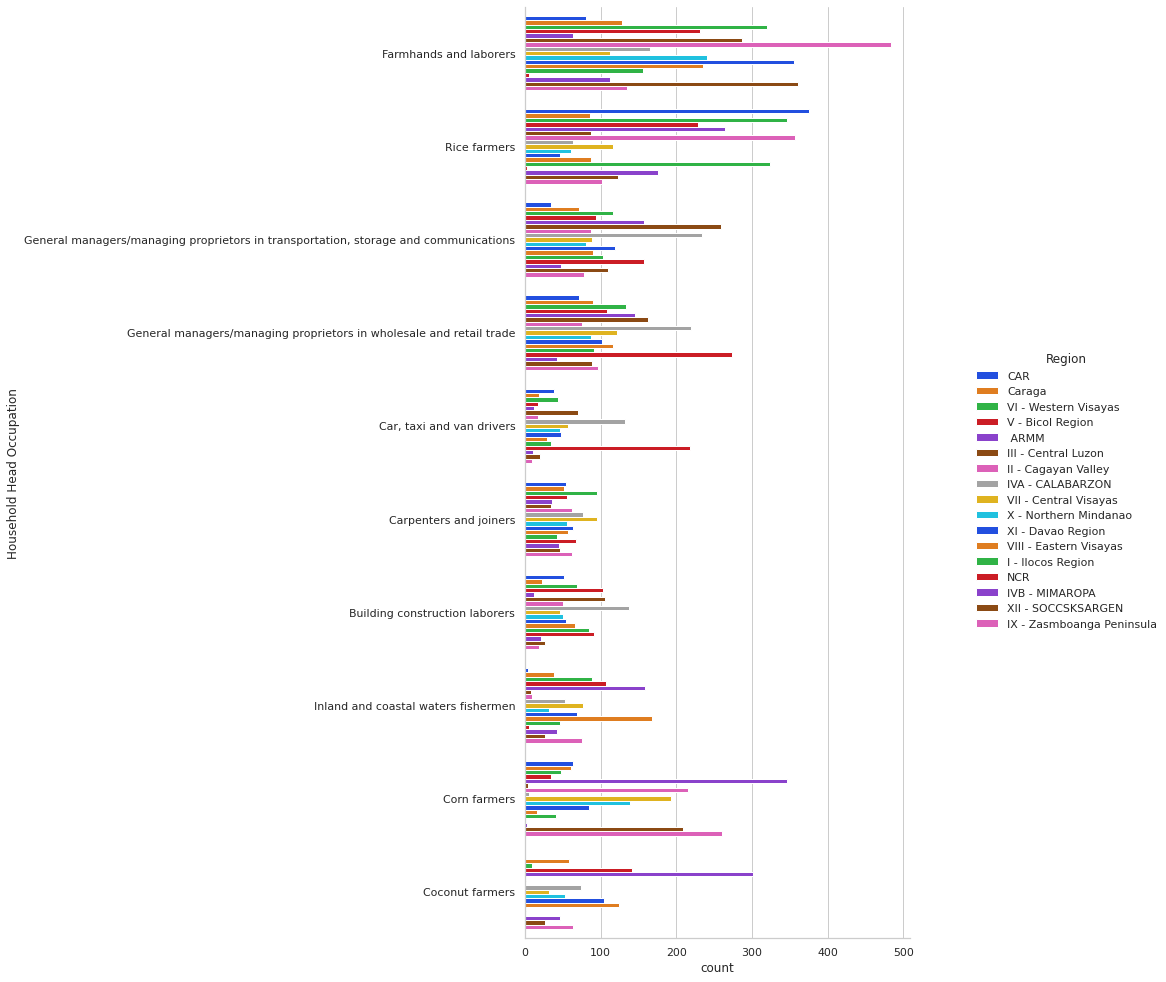

In [ ]:
job_region_plot = sns.catplot(y="Household Head Occupation",
                                  data= data[data["Household Head Occupation"].isin(head_occupation["Household Head Occupation"]) & data["Region"].isin(regions["Region"])],
                                  kind="count",
                                  palette = "bright",
                                  hue="Region")
job_region_plot.fig.set_size_inches(10, 15)

Based on the graph there are more people with certain jobs in some regions as compared to the others. For example Region II has the  most number of Farmhands and laborers as compared to the other regions. On the other hand, NCR has the most number of Car, taxi and van drivers.

### Highest Grade Completed and Job

The graph `highestGrade_job_plot` shows the highest grade attained by the different household heads in the top 10 occupations.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


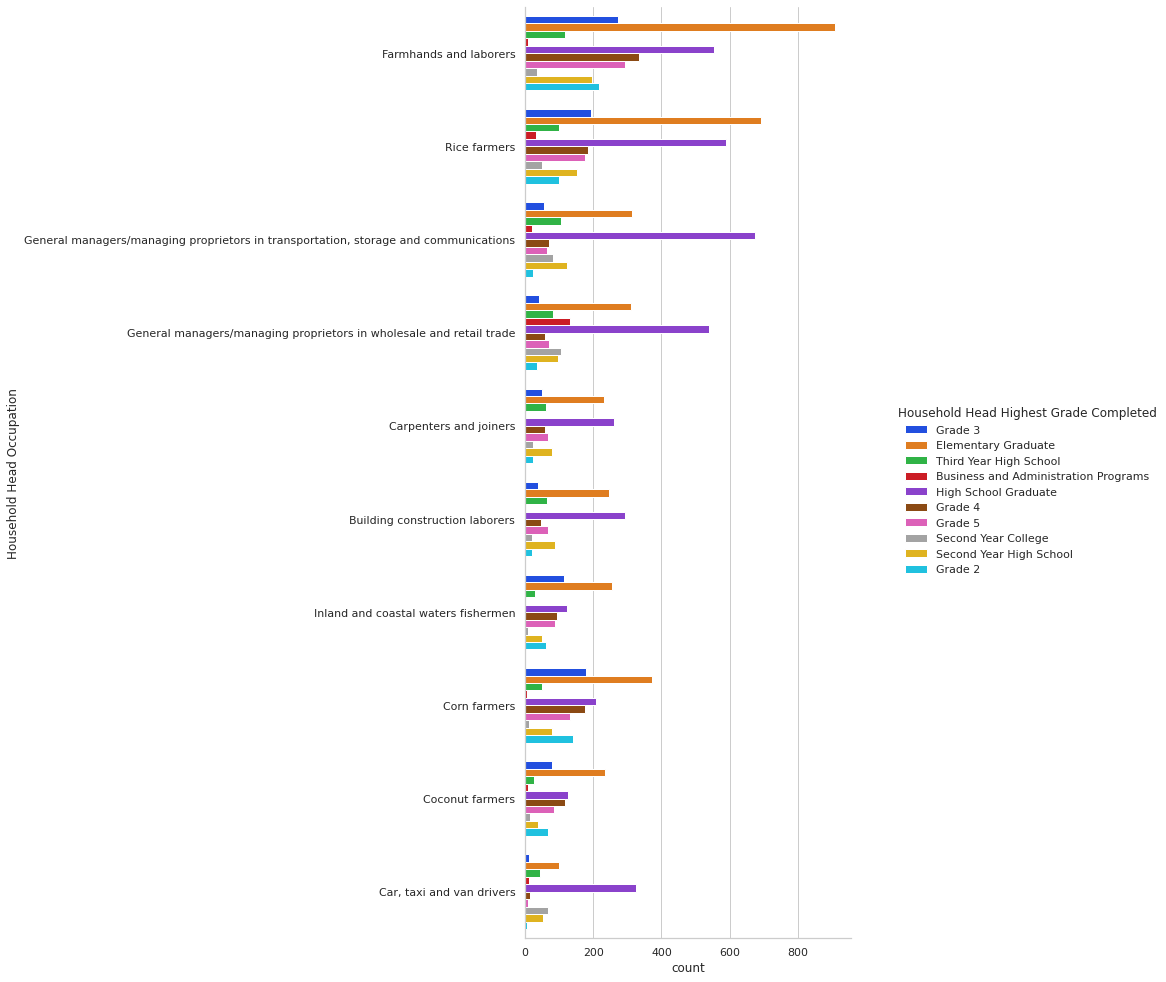

In [ ]:
highestGrade_job_plot = sns.catplot(y="Household Head Occupation",
                                  data= data[data["Household Head Occupation"].isin(head_occupation["Household Head Occupation"]) & data["Household Head Highest Grade Completed"].isin(highest_grade_completed["Household Head Highest Grade Completed"])],
                                  kind="count",
                                  palette = "bright",
                                  hue="Household Head Highest Grade Completed")
highestGrade_job_plot.fig.set_size_inches(10,15)

Based on the graph generated here we can see that most farmhands and laboreres were only able to complete elementary education followed by those that were able to graduate high school. However there are also a lot of farmhands and laborers that did not even finish their elementary education. The same pattern can also be noticed in rice farmers, corn farmers, coconut farmers, and fishermen. On the other hand, the other occupations on the graph mostly consist of high school graduates.

### Source of Income and Highest Grade Completed

The graph `sourceIncome_highestGrade_plot` shows the breakdown of the highest grade completed by the different household heads and their main source of income.

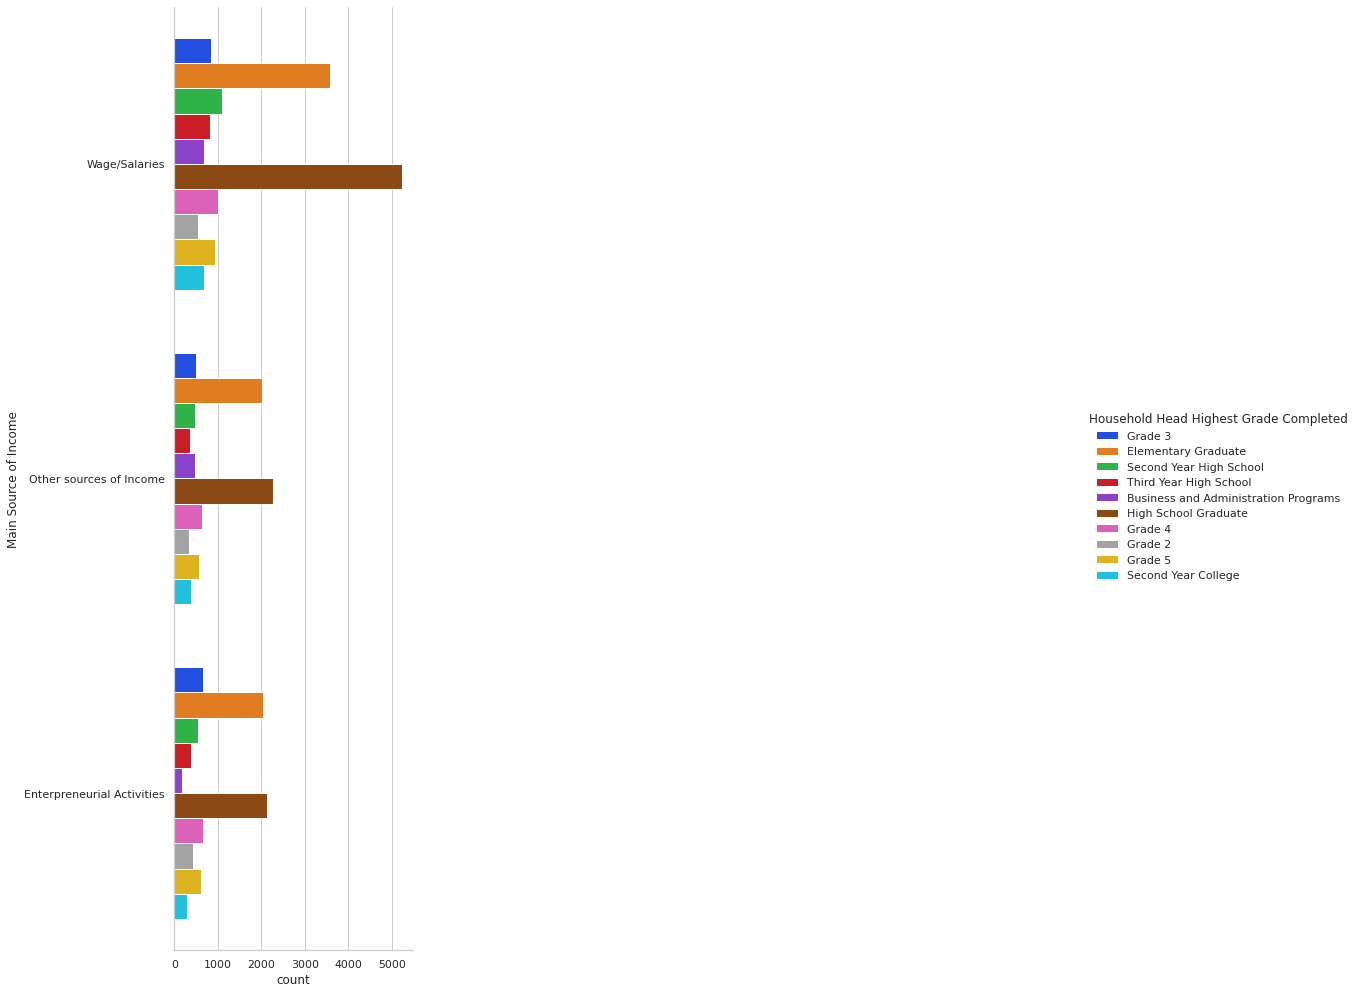

In [ ]:
sourceIncome_highestGrade_plot = sns.catplot(y="Main Source of Income",
                                  data= data[data["Main Source of Income"].isin(source_of_income["Main Source of Income"]) & data["Household Head Highest Grade Completed"].isin(highest_grade_completed["Household Head Highest Grade Completed"])],
                                  kind="count",
                                  palette = "bright",
                                  hue="Household Head Highest Grade Completed")
sourceIncome_highestGrade_plot.fig.set_size_inches(30,15)

Based on the graph, majority of highschool and elementary graduates have Wage/Salary as their main source of income.

### Region vs Total Food Expenditures

The graph `reg_total_food_plot` shows how much each household in every region spends on food related expenses.

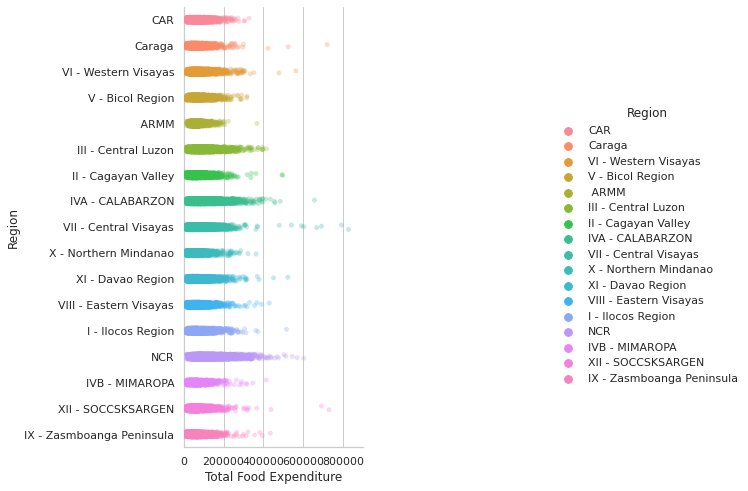

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_total_food_plot = sns.boxplot(data=data, x="Total Food Expenditure", y="Region", hue="Region", palette="colorblind")
reg_total_food_plot = sns.catplot(data=data, x="Total Food Expenditure", y="Region", hue="Region", alpha=0.3)
reg_total_food_plot.set(xlim=(0, 900000))
reg_total_food_plot.fig.set_size_inches(15,7)

The graph shown gives us an illustration of how much families in a region spend on food expenses. However, there are some outliers that could be handled so that the data can be illustrated better.

The z score is used in order to create a new dataframe which stores the filtered values, removing the outliers from the dataframe.

In [ ]:
tof_z_scores = zscore(data["Total Food Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(tof_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
tof_filtered = (abs_z_scores < 3) 

After filtering the values, `reg_total_food_filtered_plot` is generated to visualize the filtered values.

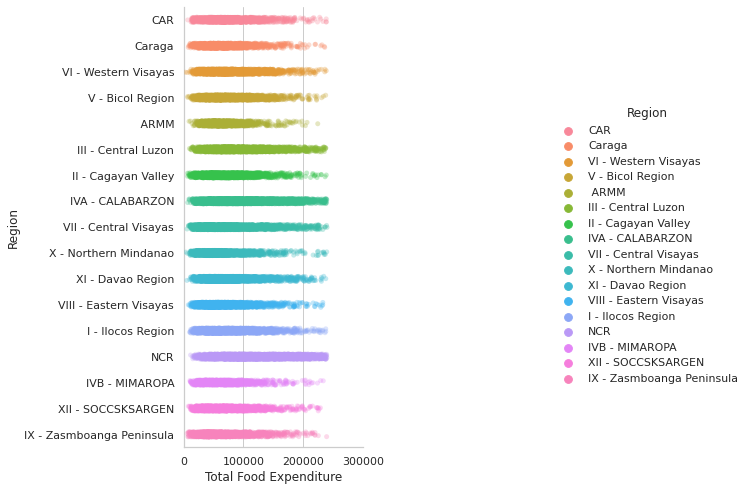

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_total_food_plot = sns.boxplot(data=data[tof_filtered], x="Total Food Expenditure", y="Region", hue="Region", palette="colorblind")
reg_total_food_filtered_plot = sns.catplot(data=data[tof_filtered], x="Total Food Expenditure", y="Region", hue="Region", alpha=0.3)
reg_total_food_filtered_plot.set(xlim=(0, 300000))
reg_total_food_filtered_plot.fig.set_size_inches(15,7)

Once the outliers were removed, you can see that
1. NCR, CALABARZON, and Central Luzon have the most families that more than Php 200,000 for their total food expenses.
2. ARMM would have the least number of families that spend more than Php 200,000. 

### Region vs Bread and Cereals Expenditure

The graph `reg_bce_plot` shows how much each household in every region spends on bread and cereals.

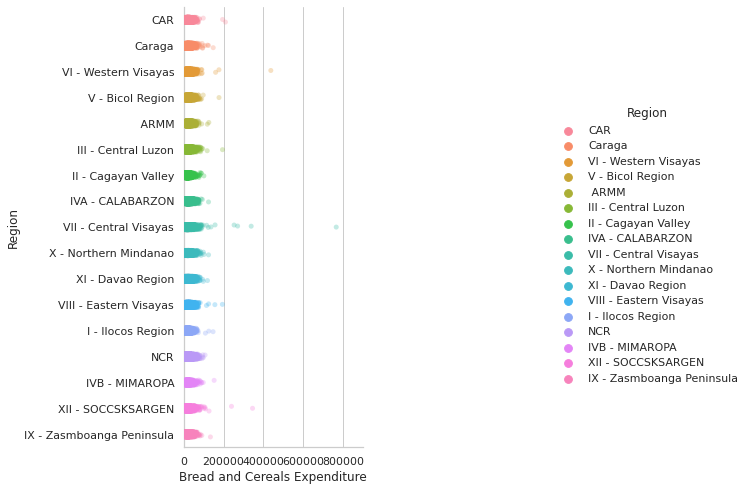

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_bce_plot = sns.boxplot(data=data, x="Bread and Cereals Expenditure", y="Region", hue="Region")
reg_bce_plot = sns.catplot(data=data, x="Bread and Cereals Expenditure", y="Region", hue="Region", alpha=0.3)
reg_bce_plot.set(xlim=(0, 900000))
reg_bce_plot.fig.set_size_inches(15,7)

The graph shown gives us an illustration of how much families in a region spend on bread and cereals. However, there are some outliers that could be handled so that the data can be illustrated better.

The z score is used in order to create a new dataframe which stores the filtered values, removing the outliers from the dataframe.

In [ ]:
bc_z_scores = zscore(data["Bread and Cereals Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(bc_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
bc_filtered = (abs_z_scores < 3) 

After filtering the values, `reg_bce_filtered_plot` is generated to visualize the filtered values.

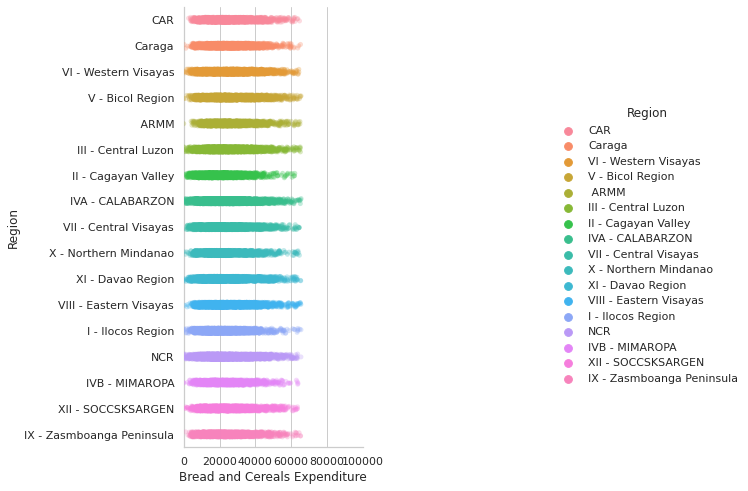

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_bce_filtered_plot = sns.boxplot(data=data[bc_filtered], x="Bread and Cereals Expenditure", y="Region", hue="Region")
reg_bce_filtered_plot = sns.catplot(data=data[bc_filtered], x="Bread and Cereals Expenditure", y="Region", hue="Region", alpha=0.3)
reg_bce_filtered_plot.set(xlim=(0, 100000))
reg_bce_filtered_plot.fig.set_size_inches(15,7)

Once the outliers were removed, you can see that most families in every region spend roughly the same amount of money on bread and cereals

### Region vs Total Rice Expenditure

The graph `reg_tr_plot` shows how much each household in every region spends on rice.

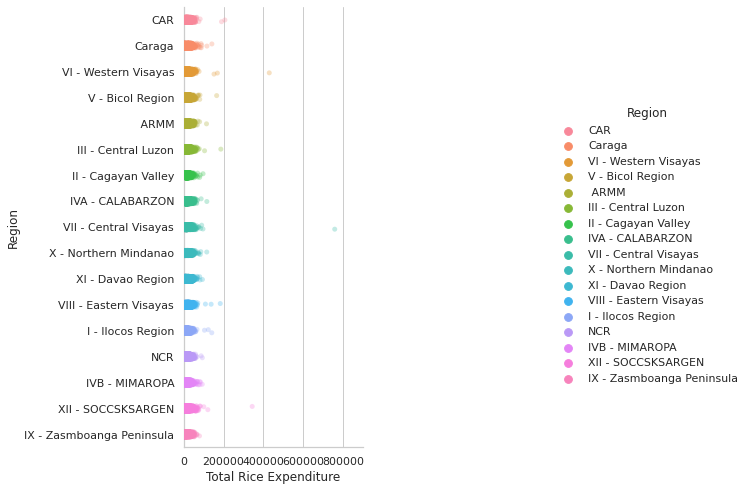

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_tr_plot = sns.catplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region", alpha=0.3)
reg_tr_plot.set(xlim=(0, 900000))
reg_tr_plot.fig.set_size_inches(15,7)

The graph shown gives us an illustration of how much families in a region spend on rice. However, the graph is very cluttered and there are some outliers that could be handled so that the data can be illustrated better.

The z score is used in order to create a new dataframe which stores the filtered values, removing the outliers from the dataframe.

In [ ]:
tr_z_scores = zscore(data["Total Rice Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(tr_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
tr_filtered = (abs_z_scores < 3) 

After filtering the values, `reg_tr_filtered_plot` is generated to visualize the filtered values.

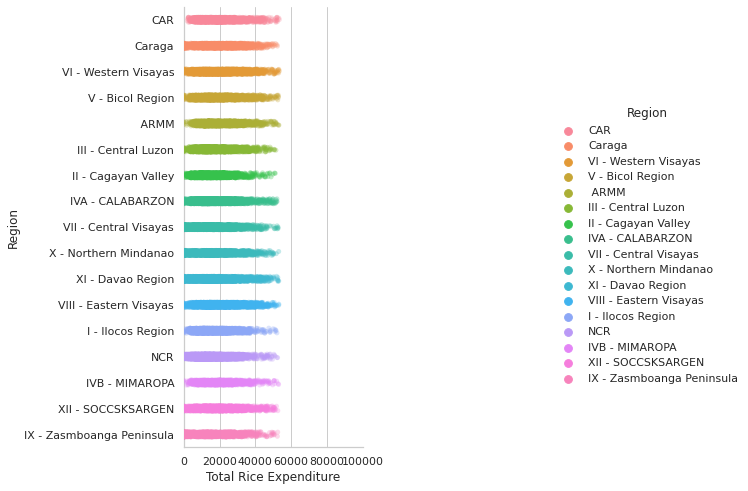

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_tr_filtered_plot = sns.catplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region", alpha=0.3)
reg_tr_filtered_plot.set(xlim=(0, 100000))
reg_tr_filtered_plot.fig.set_size_inches(15,7)

Once the outliers were removed, you can see that most families in every region spend roughly the same amount of money on rice. 

### Region vs Meat Expenditure

The graph `reg_m_plot` shows how much each household in every region spends on meat.

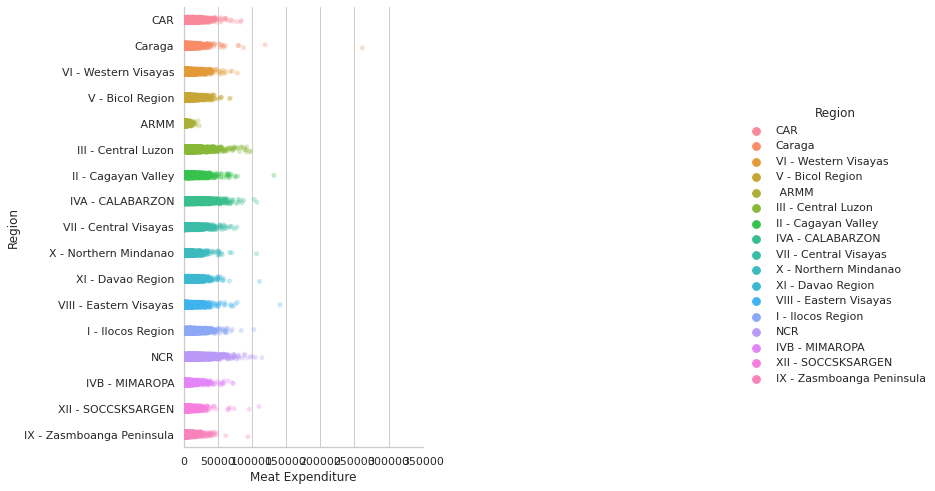

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_m_plot = sns.catplot(data=data, x="Meat Expenditure", y="Region", hue="Region", alpha=0.3)
reg_m_plot.set(xlim=(0, 350000))
reg_m_plot.fig.set_size_inches(20,7)

The graph shown gives us an illustration of how much families in a region spend on meat. However, there are some outliers that could be handled so that the data can be illustrated better.

The z score is used in order to create a new dataframe which stores the filtered values, removing the outliers from the dataframe.

In [ ]:
m_z_scores = zscore(data["Meat Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(m_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
m_filtered = (abs_z_scores < 3) 

After filtering the values, `reg_m_filtered_plot` is generated to visualize the filtered values.

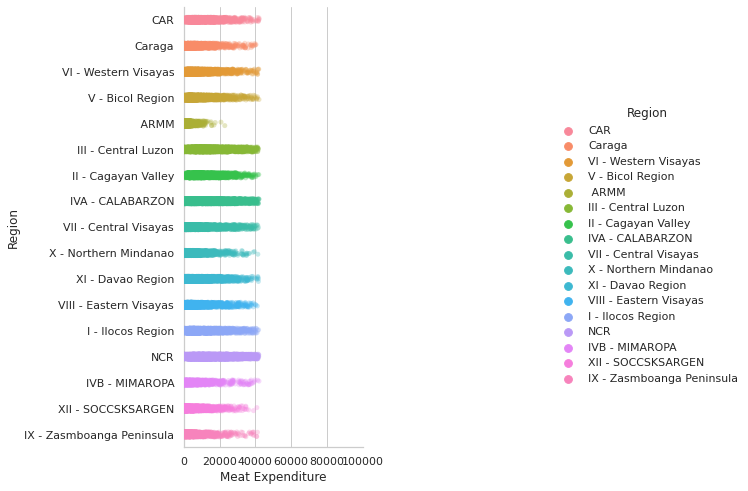

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_m_filtered_plot = sns.catplot(data=data[m_filtered], x="Meat Expenditure", y="Region", hue="Region", alpha=0.3)
reg_m_filtered_plot.set(xlim=(0, 100000))
reg_m_filtered_plot.fig.set_size_inches(15,7)

Once the outliers were removed, you can see that ARMM spends the on meat the least, while other regions spend roughl the same amounts on meat. 

### Region vs Total Fish and Marine Products Expenditure

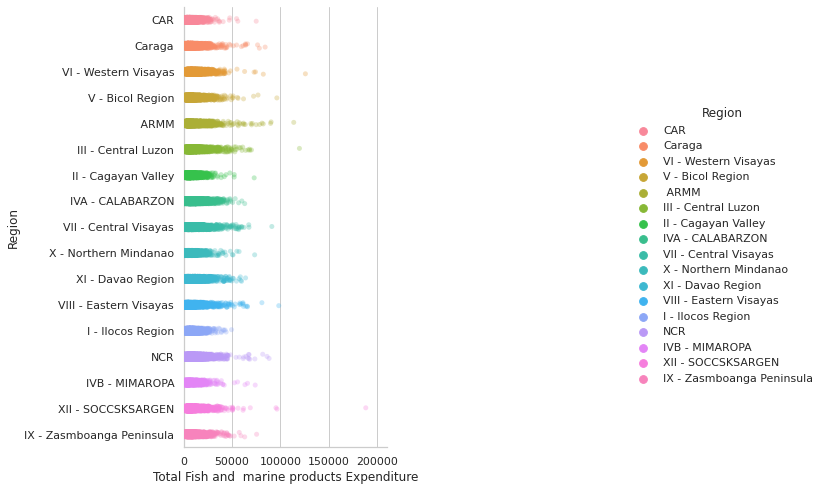

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_tfm_plot = sns.catplot(data=data, x="Total Fish and  marine products Expenditure", y="Region", hue="Region", alpha=0.3)
reg_tfm_plot.set(xlim=(0, 210000))
reg_tfm_plot.fig.set_size_inches(17,7)

In [ ]:
tfm_z_scores = zscore(data["Total Fish and  marine products Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(tfm_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
tfm_filtered = (abs_z_scores < 3) 

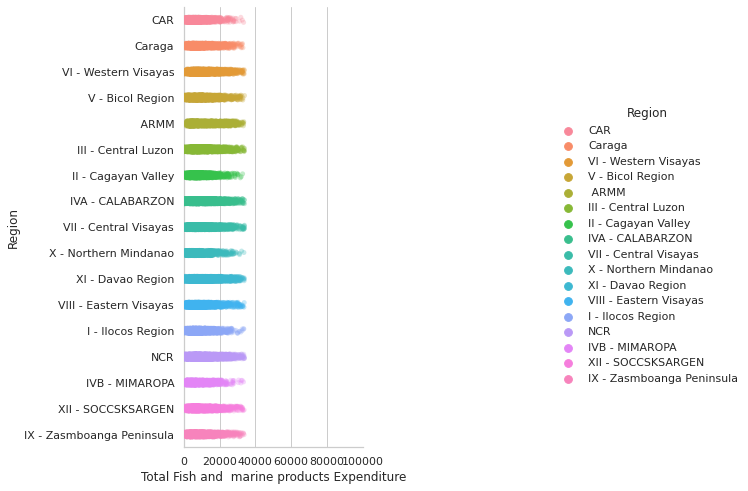

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_tfm_filtered_plot = sns.catplot(data=data[tfm_filtered], x="Total Fish and  marine products Expenditure", y="Region", hue="Region", alpha=0.3)
reg_tfm_filtered_plot.set(xlim=(0, 100000))
reg_tfm_filtered_plot.fig.set_size_inches(15,7)

### Region vs Fruit Expenditure
We compared the Fruit Expenditure per region to see if this had any major impact.

First, a catplot was used to set the x axis to Fruit Expenditure, and y axis to region. The x limit was also set to 0 and 300,000, to help visualize the data better and remove outliers.

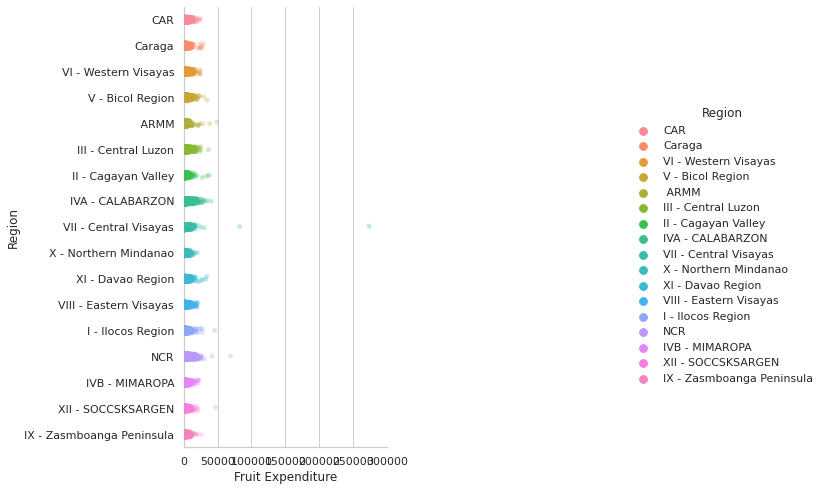

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_f_plot = sns.catplot(data=data, x="Fruit Expenditure", y="Region", hue="Region", alpha=0.3)
reg_f_plot.set(xlim=(0, 300000))
reg_f_plot.fig.set_size_inches(17,7)

The graph shows the number of families in each region with fruit expenses in the x axis, however to better visualize the data, we'll be removing the outliers. 

To remove the outliers, we use the z score and create a dataframe which will store the filtered values.

In [ ]:
f_z_scores = zscore(data["Fruit Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(f_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
f_filtered = (abs_z_scores < 3) 

With the filtered data, a new graph is created.

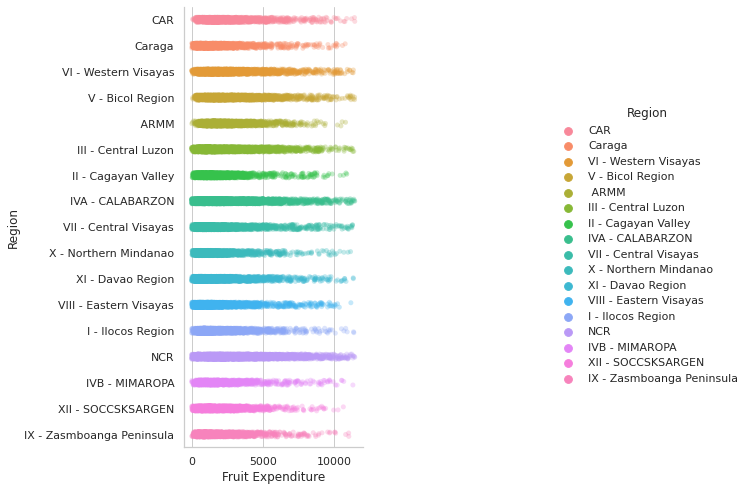

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_f_filtered_plot = sns.catplot(data=data[f_filtered], x="Fruit Expenditure", y="Region", hue="Region", alpha=0.3)
# reg_f_filtered_plot.set(xlim=(0, 20000))
reg_f_filtered_plot.fig.set_size_inches(15,7)

After the outliers have been taken care of, we can see that

1. CALABARZON and NCR are the regions with families with high Fruit Expenditures
2. SOCCSKSARGEN and Zamboanga Peninsula have generally lower Fruit Expenditures

### Region vs Vegetables Expenditure
We then compared the Vegetable Expenditure per region to see if this had any notable effects.

We created a catplot and set the x axis to Vegetables Expenditure, and y axis to region. We also decided to set the x limit to 0 and 100,000, to help visualize the data better and remove outliers.

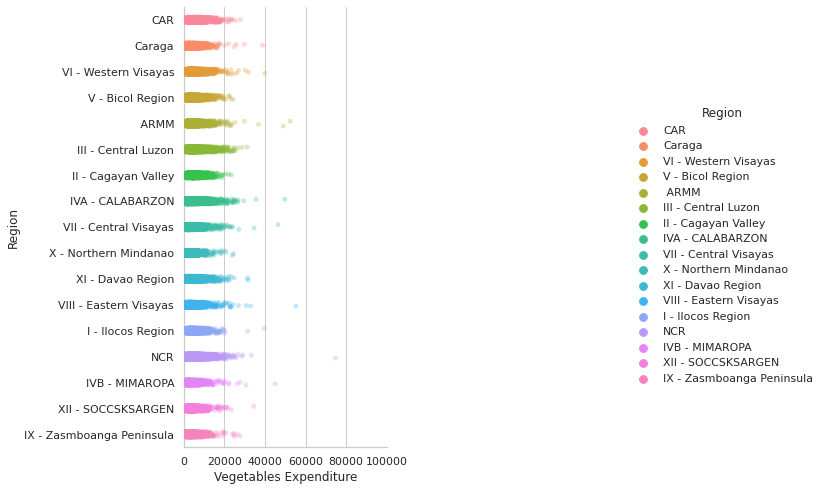

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_v_plot = sns.catplot(data=data, x="Vegetables Expenditure", y="Region", hue="Region", alpha=0.3)
reg_v_plot.set(xlim=(0, 100000))
reg_v_plot.fig.set_size_inches(17,7)

It's evident in the graph generated that there are a few outliers, and to help better the visualization, we'll be removing these outliers.

We make use of the z score and create a new dataframe where the filtered values will be stored in order to remove the outliers.


In [ ]:
v_z_scores = zscore(data["Vegetables Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(v_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
v_filtered = (abs_z_scores < 3) 

A new graph is then made with these filtered values.

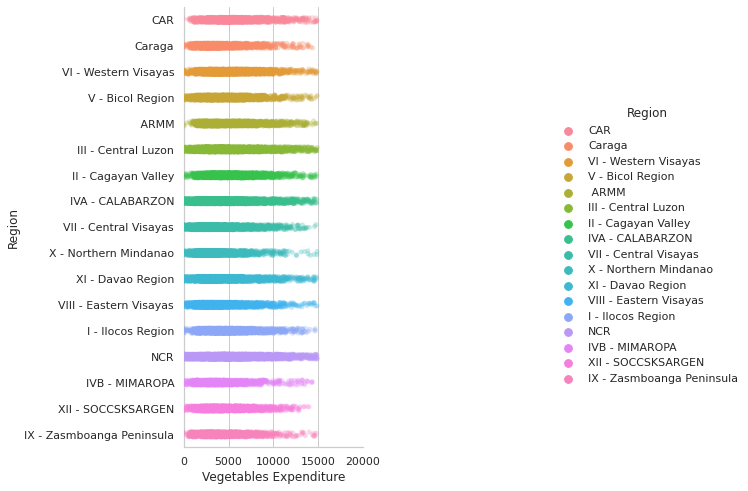

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_v_filtered_plot = sns.catplot(data=data[v_filtered], x="Vegetables Expenditure", y="Region", hue="Region", alpha=0.3)
reg_v_filtered_plot.set(xlim=(0, 20000))
reg_v_filtered_plot.fig.set_size_inches(15,7)


After filtering out the outliers, it is evident that

1. CALABARZON and NCR are the regions with families that have high Vegetable Expenditures
2. Northern Mindanao, MIMAROPA, and Zamboanga Peninsula  have fewer families exceeding Php 10000 when it comes to 		Vegerable Expenditures

### Region vs Restaurant and Hotels Expenditure
We now look at the Restaurant and Hotel Expenditure of each region to see if this has any noticeable impacts

A catplot was created where the x axis was set to Restaurant and Hotels Expenditure, and y axis to region. We also decided to set the x limit to 0 and 810,000, to help visualize the data better and remove outliers.

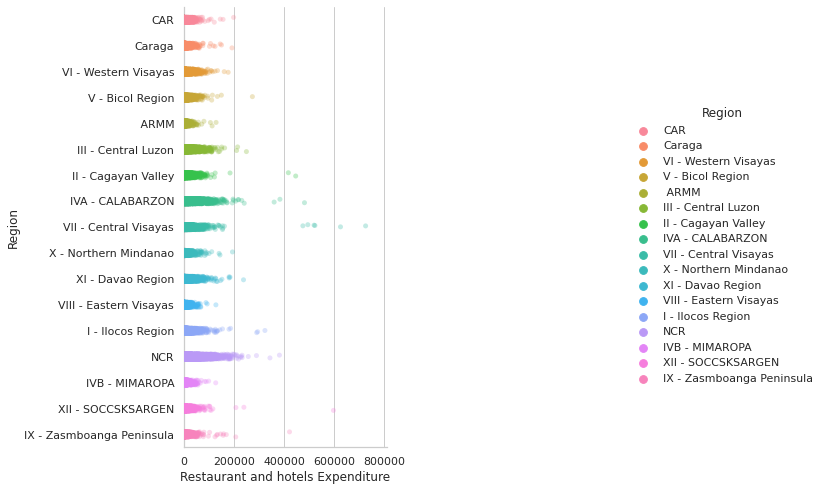

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_rh_plot = sns.catplot(data=data, x="Restaurant and hotels Expenditure", y="Region", hue="Region", alpha=0.3)
reg_rh_plot.set(xlim=(0, 810000))
reg_rh_plot.fig.set_size_inches(17,7)

The graph is created, and there are notable outliers which we will be removing to help visualize the data better.

The z score is used to create a new dataframe containing the filtered values.

In [ ]:
rh_z_scores = zscore(data["Restaurant and hotels Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(rh_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
rh_filtered = (abs_z_scores < 3) 

With the use of the filtered values, a new graph is made

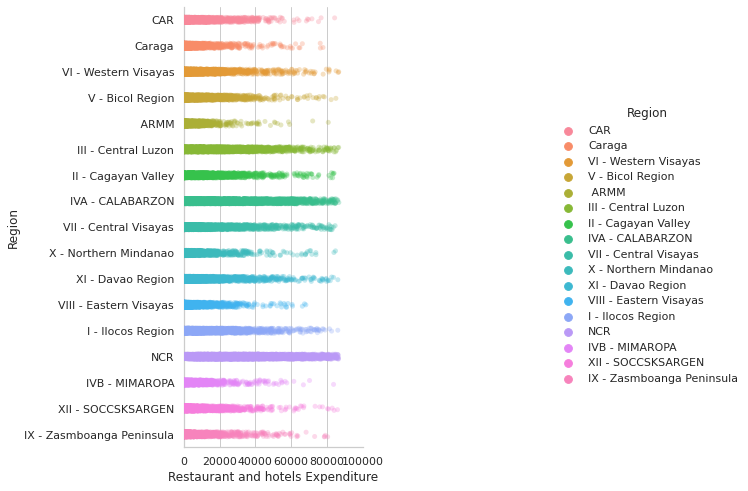

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_rh_filtered_plot = sns.catplot(data=data[rh_filtered], x="Restaurant and hotels Expenditure", y="Region", hue="Region", alpha=0.3)
reg_rh_filtered_plot.set(xlim=(0, 100000))
reg_rh_filtered_plot.fig.set_size_inches(15,7)

After dealing with the outliers, we can see that
1. NCR has the most families with Restaurant and Hotel Expenses, followed by CALABARZON
2. MIMAROPA and ARMM have the least amount of families with expenses in this area, with only a few families exceeding Php 20,000

### Region vs Alcoholic Beverages Expenditure
Now we take a look at the Alcoholic Beverages Expenditure of each region to see if there are any findings of note.

To start, we create a catplot and set the x axis to Alcoholic Beverages Expenditure, and y axis to region. We also set the x limit to 0 and 70,000 since all expenditures can be found within this range.

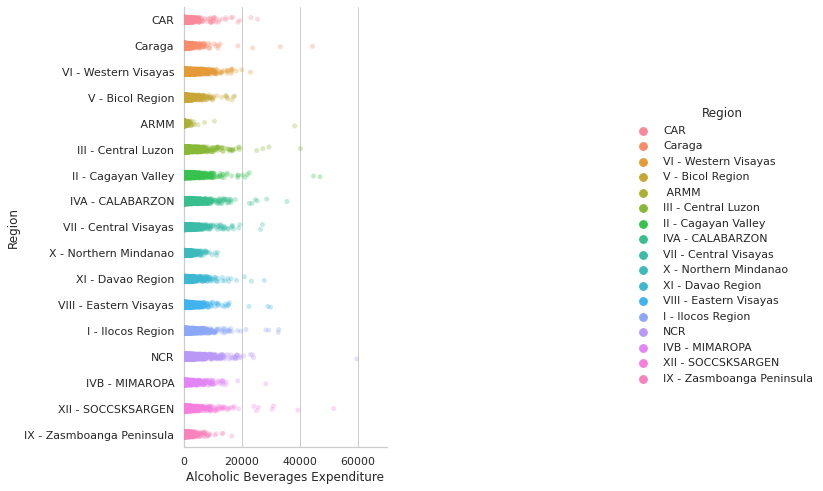

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_ab_plot = sns.catplot(data=data, x="Alcoholic Beverages Expenditure", y="Region", hue="Region", alpha=0.3)
reg_ab_plot.set(xlim=(0, 70000))
reg_ab_plot.fig.set_size_inches(17,7)

The graph shown lets us know how many families in each region have expenses, but it is clear that there are outliers to be taken care of to help visualize the data better.

The z score is used in order to create a new dataframe which stores the filtered values, removing the outliers from the dataframe.

In [ ]:
ab_z_scores = zscore(data["Alcoholic Beverages Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(ab_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
ab_filtered = (abs_z_scores < 3) 

A graph is the generated again, but with the use of the filtered values this time.

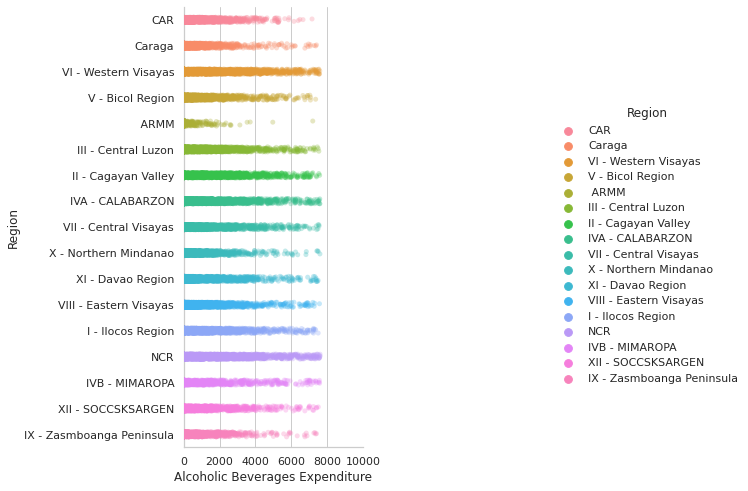

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_ab_filtered_plot = sns.catplot(data=data[ab_filtered], x="Alcoholic Beverages Expenditure", y="Region", hue="Region", alpha=0.3)
reg_ab_filtered_plot.set(xlim=(0, 10000))
reg_ab_filtered_plot.fig.set_size_inches(15,7)

Once the outliers were removed, it can be noticed that
1. NCR, CALABARZON, and Western Visayas have the most families with high expenses in Alcoholic Beverages
2. ARMM has the lowest amount of expenses in Alcoholic Beverages with only a few families even exceeding Php 2,000

### Region vs Tobacco Expenditure
The next comparison will be the Tobacco Expenditure of each region

A catplot is created, where the x axis is set to Tobacco Expenditure and the y axis is set to the region. The x limit is also set to 0 and 150,000, since the expenses only range within these values.

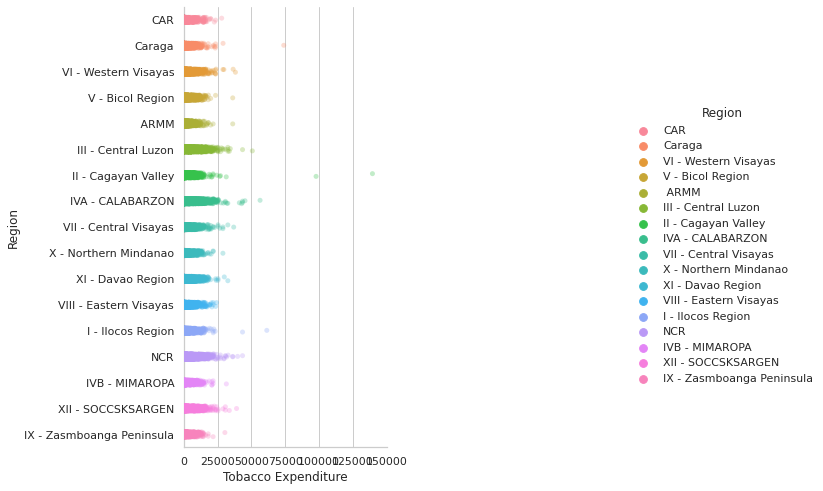

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_to_plot = sns.catplot(data=data, x="Tobacco Expenditure", y="Region", hue="Region", alpha=0.3)
reg_to_plot.set(xlim=(0, 150000))
reg_to_plot.fig.set_size_inches(17,7)

The graph created have a few noticeable outliers, which we will be removing to visualize the data better.

The z score will be used in order to create a new dataframe where the filtered values will be stored.


In [ ]:
to_z_scores = zscore(data["Tobacco Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(to_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
to_filtered = (abs_z_scores < 3) 

The new graph generated makes used of the values we filtered.

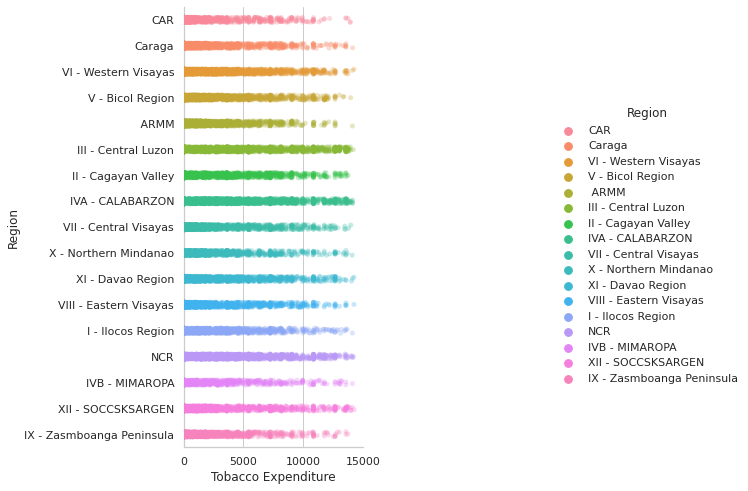

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_to_filtered_plot = sns.catplot(data=data[to_filtered], x="Tobacco Expenditure", y="Region", hue="Region", alpha=0.3)
reg_to_filtered_plot.set(xlim=(0, 15000))
reg_to_filtered_plot.fig.set_size_inches(15,7)

After removing outliers, it can be seen that
1. A majority of the regions have a lot of expenses in Tobacco, especially Central Luzon, CALABARZON, and NCR
2. The few regions that have a few families exceeding Php 10,000 are CAR, CARAGA, and ARMM

### Region vs Clothing, Footwear and Other Wear Expenditure
We compared the Clothing, Footwear and Other Wear Expenditure per region to see if there are any noteworthy findings.

To start, we use a catplot and set its x axis to Clothing, Footwear and Other Wear Expenditure, while the y axis is set to region. Aside from that, we set the x limit to 0 and 360,000 since all expenditures can be found in this range.

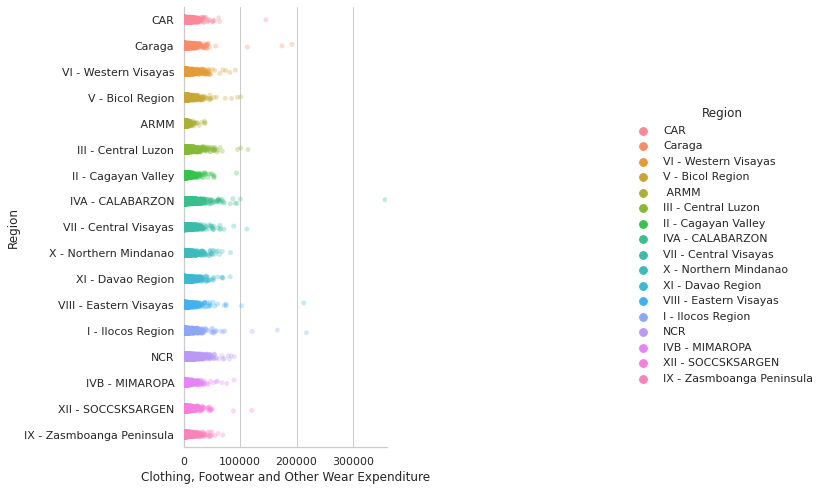

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_cfo_plot = sns.catplot(data=data, x="Clothing, Footwear and Other Wear Expenditure", y="Region", hue="Region", alpha=0.3)
reg_cfo_plot.set(xlim=(0, 360000))
reg_cfo_plot.fig.set_size_inches(17,7)

The graph created shows the number of families with expenses in each region, however to make the visualization of data better, we will be removing the noticeable outliers.

To remove the outliers, we'll make use of the z score to create a new dataframe which will be used for storing the filtered values.

In [ ]:
cfo_z_scores = zscore(data["Clothing, Footwear and Other Wear Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(cfo_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
cfo_filtered = (abs_z_scores < 3) 

A graph is then generated using the filtered values.

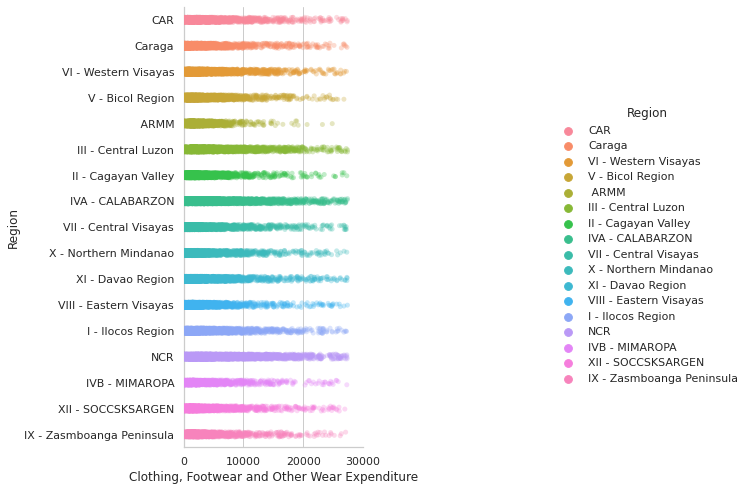

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_cfo_filtered_plot = sns.catplot(data=data[cfo_filtered], x="Clothing, Footwear and Other Wear Expenditure", y="Region", hue="Region", alpha=0.3)
reg_cfo_filtered_plot.set(xlim=(0, 30000))
reg_cfo_filtered_plot.fig.set_size_inches(15,7)

After removing the outliers, we can see that
1. CALABARZON and NCR have the highest amount of families with high expenses in Clothing, Footwear and Other Wear Expenditure
2. ARMM again is the most notable for having the lowest amount of expenses, with a low amount of families exceeding Php 10,000 

### Region vs Housing and Water Expenditure
We now compare Housing and Water Expenditure of each region to see if this has anything of note.

To begin, we create our catplot with the x axis being set to the Housing and Water Expenditure and the y axis being set to the region.

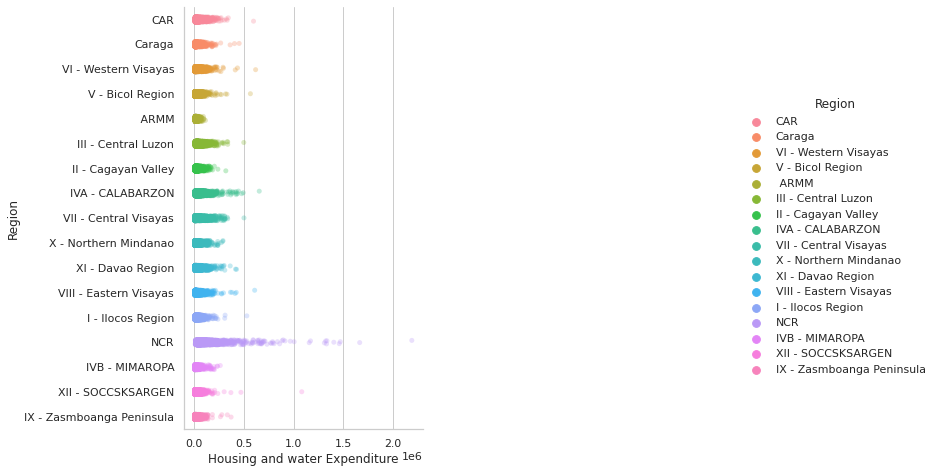

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_hw_plot = sns.catplot(data=data, x="Housing and water Expenditure", y="Region", hue="Region", alpha=0.3)
# reg_hw_plot.set(xlim=(0, 1000000))
reg_hw_plot.fig.set_size_inches(20,7)

After generating the graph, we can see that there are still outliers that can be dealt with to make the visualization of the data better.

To do so, we make use of the z score which helps in filtering the values with the use of a new dataframe.


In [ ]:
hw_z_scores = zscore(data["Housing and water Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(hw_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
hw_filtered = (abs_z_scores < 3) 

With the filtered values, we create a new graph.

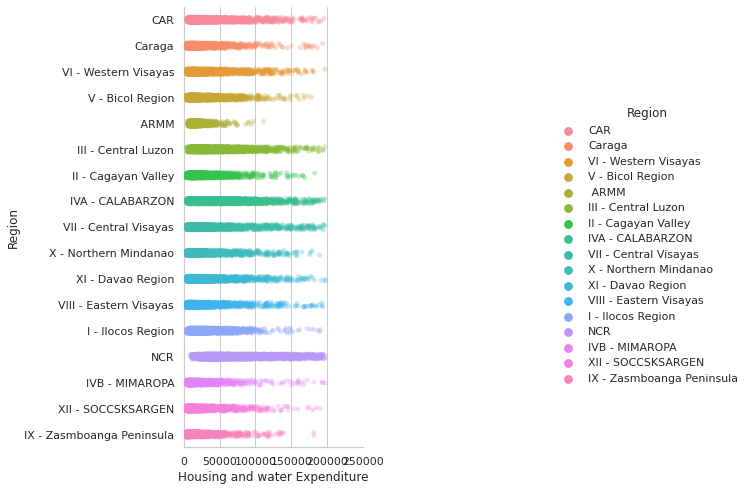

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_hw_filtered_plot = sns.catplot(data=data[hw_filtered], x="Housing and water Expenditure", y="Region", hue="Region", alpha=0.3)
reg_hw_filtered_plot.set(xlim=(0, 250000))
reg_hw_filtered_plot.fig.set_size_inches(15,7)

After filtering out the outliers, we can see that 
1. NCR, CALABARZON, and Central Visayas have the most families with high expenses in Housing and Water
2. ARMM is the lowest in expenses here, with not many families going past Php 50,000

### Region vs Medical Care Expenditure
We compared the Medical Care Expenditure per region to see if there are any findings to consider.

To do this, we began by creating a catplot with the x axis being set to Medical Care Expenditure, and the y axis being set to region. 

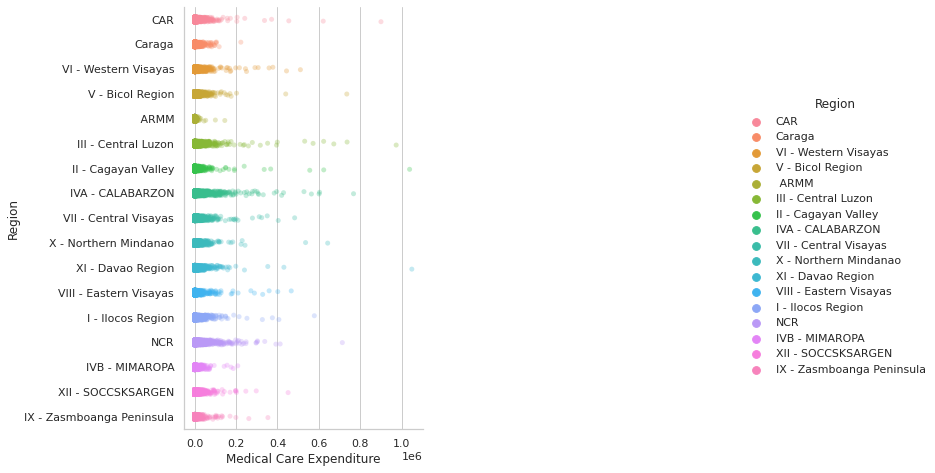

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_mc_plot = sns.catplot(data=data, x="Medical Care Expenditure", y="Region", hue="Region", alpha=0.3)
# reg_mc_plot.set(xlim=(0, 1500000))
reg_mc_plot.fig.set_size_inches(20,7)

The graph shows the number of families with expenses in medical care, however there are outliers that need to be dealt with to visualize the data better.

With the use of the z score, we created a new dataframe to store the filtered values

In [ ]:
mc_z_scores = zscore(data["Medical Care Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(mc_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
mc_filtered = (abs_z_scores < 3) 

The filtered values are used for the generation of a new graph.

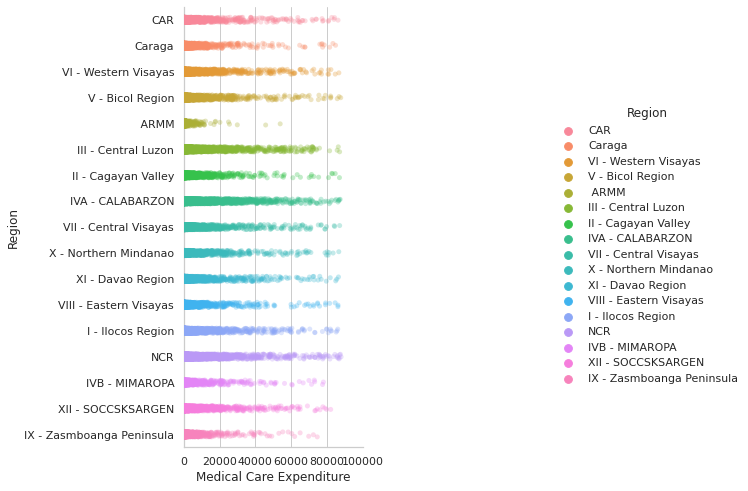

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_mc_filtered_plot = sns.catplot(data=data[mc_filtered], x="Medical Care Expenditure", y="Region", hue="Region", alpha=0.3)
reg_mc_filtered_plot.set(xlim=(0, 100000))
reg_mc_filtered_plot.fig.set_size_inches(15,7)

After removing the outliers, we can see that
1. NCR, Central Luzon, and CALABARZON have the highest number of families with high expenses in Medical Care
2. ARMM is once again notable with the low number of families exceeding Php 20,000 when it comes to their Medical Care Expenses

### Region vs Transportation Expenditure
We then compared the Transportation Expenditure per region to see if this has any major differences.

A catplot was used to set the x axis to Transportation Expenditure, and the y axis to region. The x limit was set to 0 and 850,000 to help visualize the data better since the expenses all fall under this range.

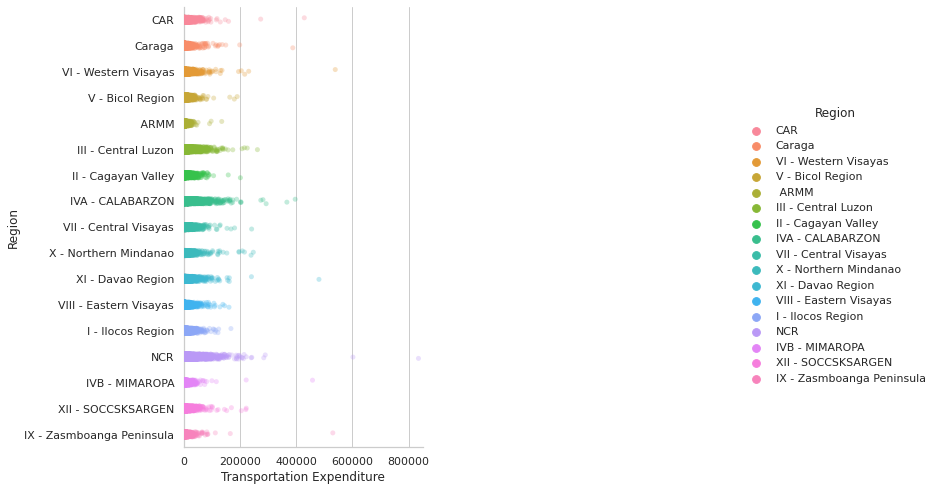

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_tra_plot = sns.catplot(data=data, x="Transportation Expenditure", y="Region", hue="Region", alpha=0.3)
reg_tra_plot.set(xlim=(0, 850000))
reg_tra_plot.fig.set_size_inches(20,7)

The graph is displayed, and in it are a few notable outliers which we will deal with.

To deal with these outliers, the z score is used to create a new dataframe storing all filtered values.


In [ ]:
tra_z_scores = zscore(data["Transportation Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(tra_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
tra_filtered = (abs_z_scores < 3) 

A new graph is made which makes use of the values we just filtered.

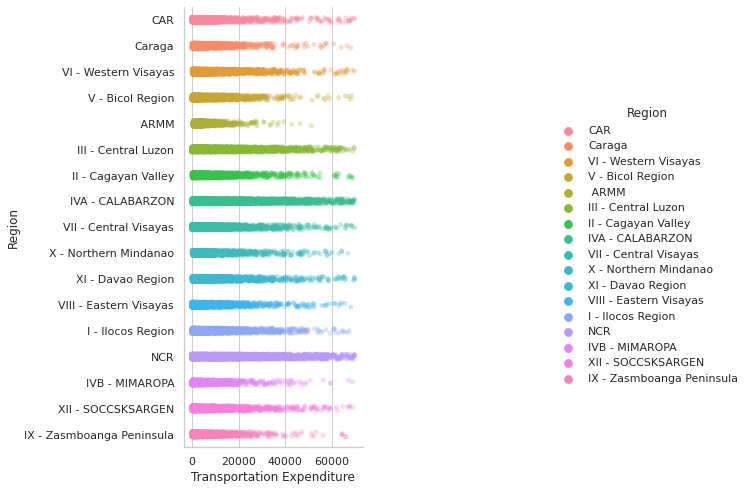

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_tra_filtered_plot = sns.catplot(data=data[tra_filtered], x="Transportation Expenditure", y="Region", hue="Region", alpha=0.3)
# reg_tra_filtered_plot.set(xlim=(0, 100000))
reg_tra_filtered_plot.fig.set_size_inches(15,7)

After filtering out the outliers, we can note that
1. NCR, CALABRZON and Central Luzon have a high number of families with expenses over Php 60,000 when it comes to Transportation Expenses
2. ARMM has very few families exceeding Php 20,000 in terms of expenses for transportation

### Region vs Communication Expenditure
We then compared the Communication Expenditure of each region to see if there was anything noteworthy.

We began with the catplot, which had its x axis set to Communication Expenses and its y axis set to region. The x limt was set to 0 and 161,000 since all expenses fall under this range anyways.

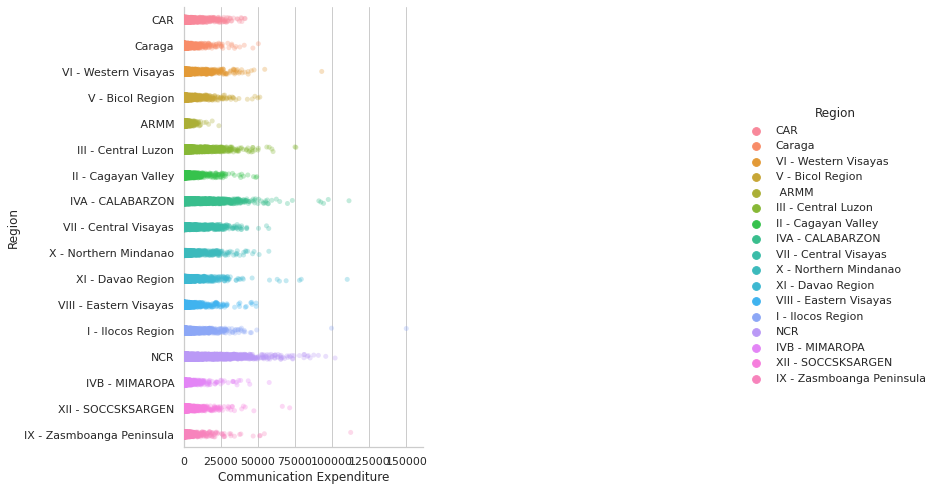

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_c_plot = sns.catplot(data=data, x="Communication Expenditure", y="Region", hue="Region", alpha=0.3)
reg_c_plot.set(xlim=(0, 161000))
reg_c_plot.fig.set_size_inches(20,7)

It is evident in the generated graph that there are outliers that need to be dealt with to visualize the data better.

To deal with this, the z score was used and the filtered values were stored in a new dataframe.

In [ ]:
c_z_scores = zscore(data["Communication Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(c_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
c_filtered = (abs_z_scores < 3) 

After filtering the values, we can now create a new graph.

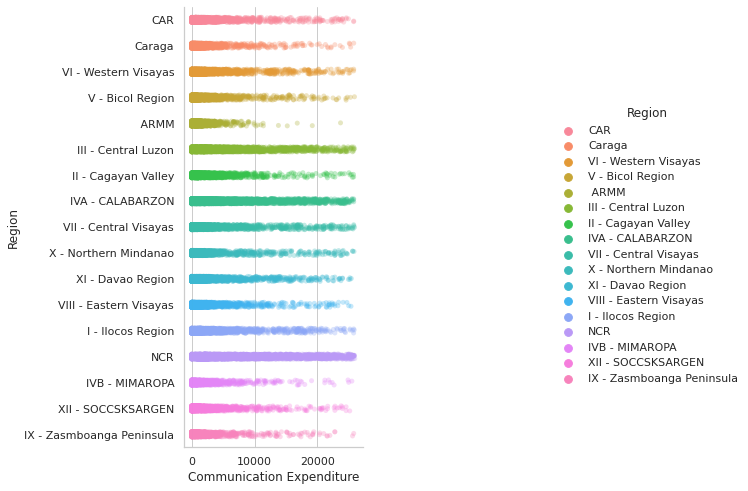

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_c_filtered_plot = sns.catplot(data=data[c_filtered], x="Communication Expenditure", y="Region", hue="Region", alpha=0.3)
# reg_tr_filtered_plot.set(xlim=(0, 100000))
reg_c_filtered_plot.fig.set_size_inches(15,7)

In this filtered graph, we can see that
1. NCR has the most families with expenses over Php 20,000 with CALABARZON and Central Luzon, not far behind
2. ARMM is of note as there is only a small number of families exceeding Php 10,000 for their communication expenses

### Region vs Education Expenditure

We compared the Education Expenditure per region as well to see if there are any significant findings 

To do this, we used a catplot and set the x axis to Education Expenditure, and y axis to region. We also set the x limit to 0 and 810,000 since all expenditures fall under this range.

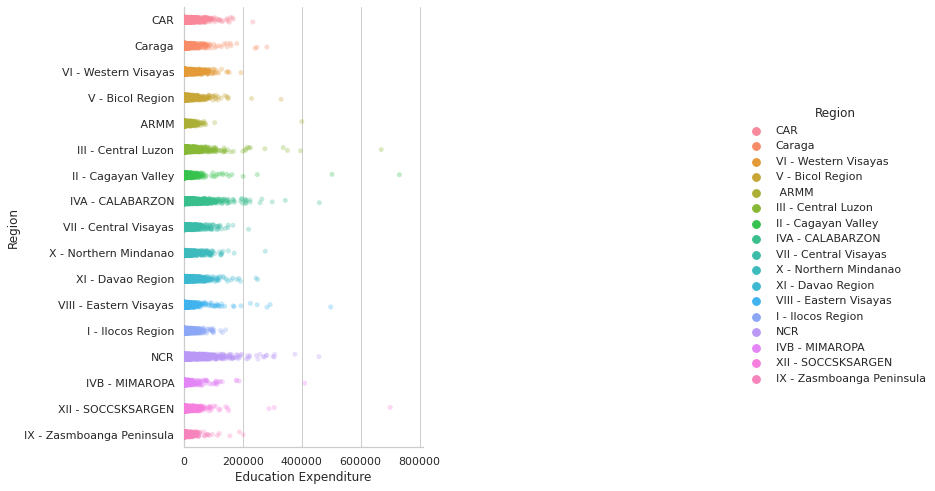

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_e_plot = sns.catplot(data=data, x="Education Expenditure", y="Region", hue="Region", alpha=0.3)
reg_e_plot.set(xlim=(0, 810000))
reg_e_plot.fig.set_size_inches(20,7)

The graph shows how many families in each region have expenses in the x axis, however, we can see that each region also contains a few outliers, in order to better visualize the data, we will remove the outliers.

To remove the outliers, we made use of the z score and created a new dataframe to store the filtered values.

In [ ]:
e_z_scores = zscore(data["Education Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(e_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
e_filtered = (abs_z_scores < 3) 

After getting the filtered data, we created a graph same as the previous one but using the filtered data

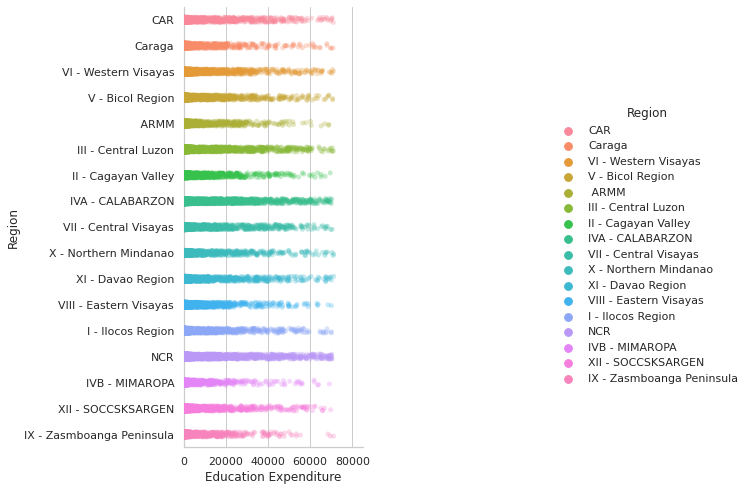

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_e_filtered_plot = sns.catplot(data=data[e_filtered], x="Education Expenditure", y="Region", hue="Region", alpha=0.3)
reg_e_filtered_plot.set(xlim=(0, 85000))
reg_e_filtered_plot.fig.set_size_inches(15,7)

After removing the outliers, we can see that

1.   CALABARZON and NCR are the regions with families whose Education Expenditures are the highters
2.   MIMAROPA and Zamboanga Peninsula have fewer families that exceed Php 40, 000 on Education Expenditure



### Region vs Miscellaneous Goods and Services Expenditure

We compared the Miscellaneous Goods and Services Expenditure per region as well to see if there are any significant findings 

To do this, we used a catplot and set the x axis to Miscellaneous Goods and Services Expenditure, and y axis to region. We also set the x limit to 0 and 610,000 since all expenditures fall under this range.

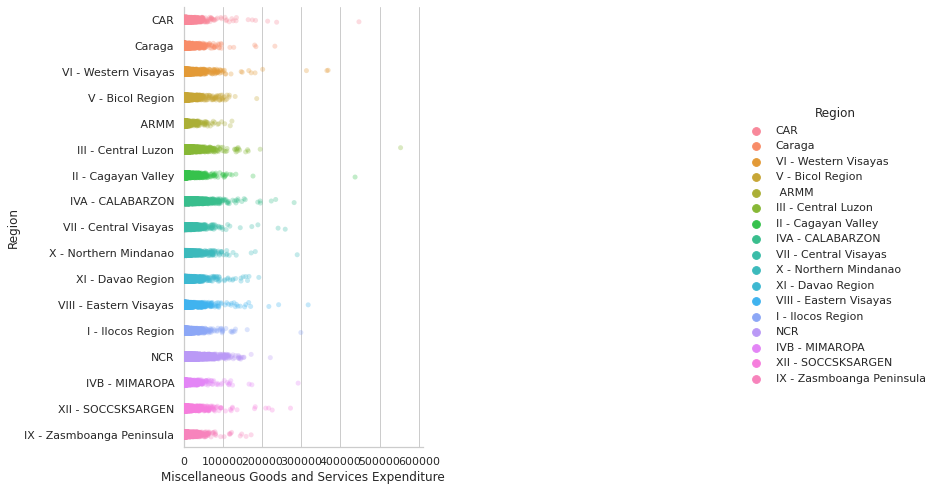

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_mgs_plot = sns.catplot(data=data, x="Miscellaneous Goods and Services Expenditure", y="Region", hue="Region", alpha=0.3)
reg_mgs_plot.set(xlim=(0, 610000))
reg_mgs_plot.fig.set_size_inches(20,7)

As we can see, the x axis of the graph is very cluttered and we can see that outliers are affecting the graph.

To remove the outliers, we made use of the z score and created a new dataframe to store the filtered values.

In [ ]:
mgs_z_scores = zscore(data["Miscellaneous Goods and Services Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(mgs_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
mgs_filtered = (abs_z_scores < 3) 

After getting the filtered data, we created a graph same as the previous one but using the filtered data

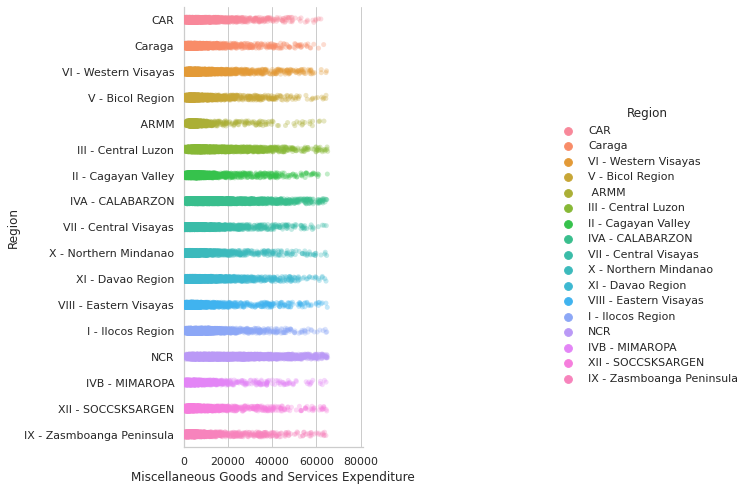

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_mgs_filtered_plot = sns.catplot(data=data[mgs_filtered], x="Miscellaneous Goods and Services Expenditure", y="Region", hue="Region", alpha=0.3)
reg_mgs_filtered_plot.set(xlim=(0, 81000))
reg_mgs_filtered_plot.fig.set_size_inches(15,7)

From the graph, the following observations were made:


1.   ARMM is the region with the least expenses for miscellaneous goods and services
2.   NCR is the region with the most expenses for miscellaneous goods and services



### Region vs Special Occasions Expenditure

We compared the Special Occasions Expenditure per region as well to see if there are any significant findings 

To do this, we used a catplot and set the x axis to Special Occasions Expenditure, and y axis to region. We also set the x limit to 0 and 650,000 since all expenditures fall under this range.

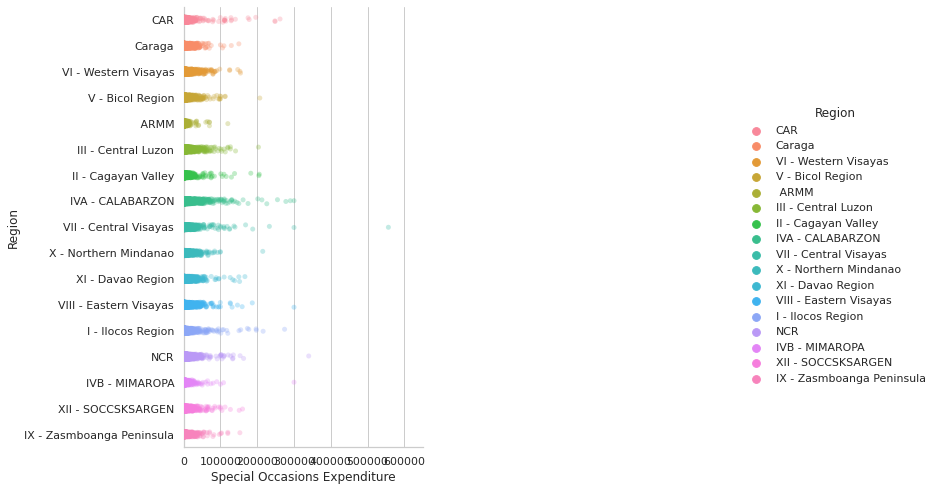

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_so_plot = sns.catplot(data=data, x="Special Occasions Expenditure", y="Region", hue="Region", alpha=0.3)
reg_so_plot.set(xlim=(0, 650000))
reg_so_plot.fig.set_size_inches(20,7)

The graph created is a little cluttered and we can see that there are outliers in the data.

To remove the outliers, we made use of the z score and created a new dataframe to store the filtered values.

In [ ]:
so_z_scores = zscore(data["Special Occasions Expenditure"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(so_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
so_filtered = (abs_z_scores < 3) 

After getting the filtered data, we created a graph same as the previous one but using the filtered data

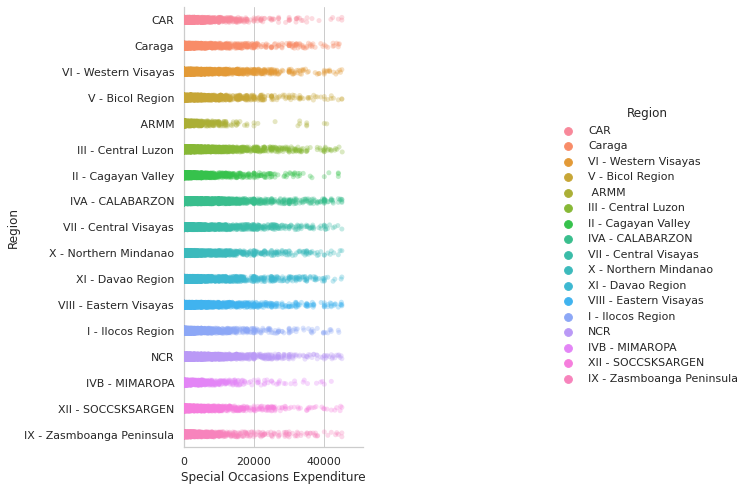

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_so_filtered_plot = sns.catplot(data=data[so_filtered], x="Special Occasions Expenditure", y="Region", hue="Region", alpha=0.3)
reg_so_filtered_plot.set(xlim=(0, 51000))
reg_so_filtered_plot.fig.set_size_inches(15,7)

From the graph, we observed the following:

1.   ARMM has the least expenses from special occasions
2.   CALABARZON and Cetral Luzon are among the regions that have the most expenses on special occasions.



### Region vs Crop Farming and Gardening 

We compared the Crop Farming and Gardening Expenditure per region as well to see if there are any significant findings 

To do this, we used a catplot and set the x axis to Crop Farming and Gardening expenses, and y axis to region.

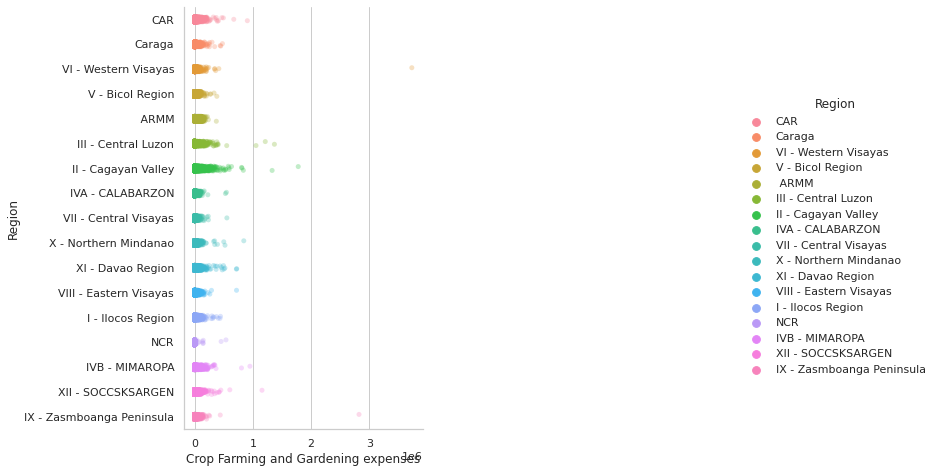

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data, x="Total Rice Expenditure", y="Region", hue="Region")
reg_cfge_plot = sns.catplot(data=data, x="Crop Farming and Gardening expenses", y="Region", hue="Region", alpha=0.3)
# reg_cfge_plot.set(xlim=(0, 650000))
reg_cfge_plot.fig.set_size_inches(20,7)

From the graph above, we can see that there are a few outliers that may be affecting the data, so we removed the outliers using the z scores.

In [ ]:
cfge_z_scores = zscore(data["Crop Farming and Gardening expenses"]) 

# Get their absolute values for easy filtering
abs_z_scores = np.abs(cfge_z_scores)

# An array of boolean values with same length as the original dataset. 
# True if value is less than 3 standard deviations from the mean or not an outlier. Otherwise, False.
cfge_filtered = (abs_z_scores < 3) 

After getting the filtered data, we created a graph same as the previous one but using the filtered data

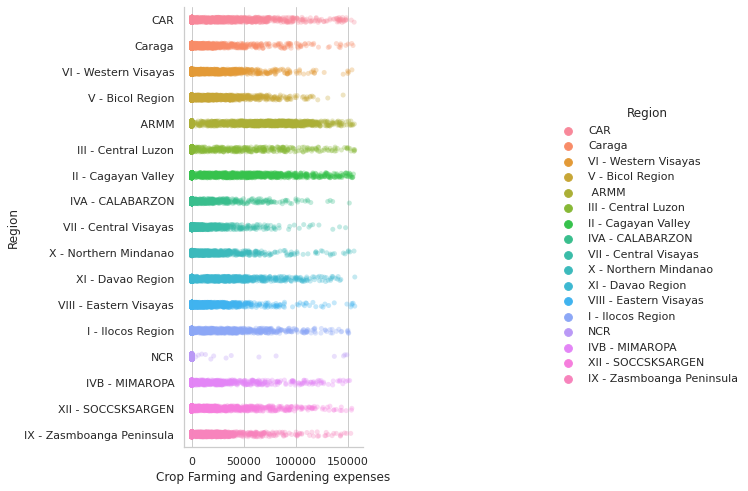

In [ ]:
# fig, ax = plt.subplots(figsize=(17.5, 8.5))
# reg_tr_plot = sns.boxplot(data=data[tr_filtered], x="Total Rice Expenditure", y="Region", hue="Region")
reg_cfge_filtered_plot = sns.catplot(data=data[cfge_filtered], x="Crop Farming and Gardening expenses", y="Region", hue="Region", alpha=0.3)
# reg_cfge_filtered_plot.set(xlim=(0, 180000))
reg_cfge_filtered_plot.fig.set_size_inches(15,7)

From the graph, we can see that NCR stands out because it has the least Crop Farming and Gardening expenses, this may be due to NCR being more urbanized than the other regions. We can also see that ARMM and Cagayan Valley are the regions that had the most Crop Farming and Gardening Expenses.

We tried to create another graph to better visualize the data, this time, we used a FacetGrid to show each region and the expenses per region.

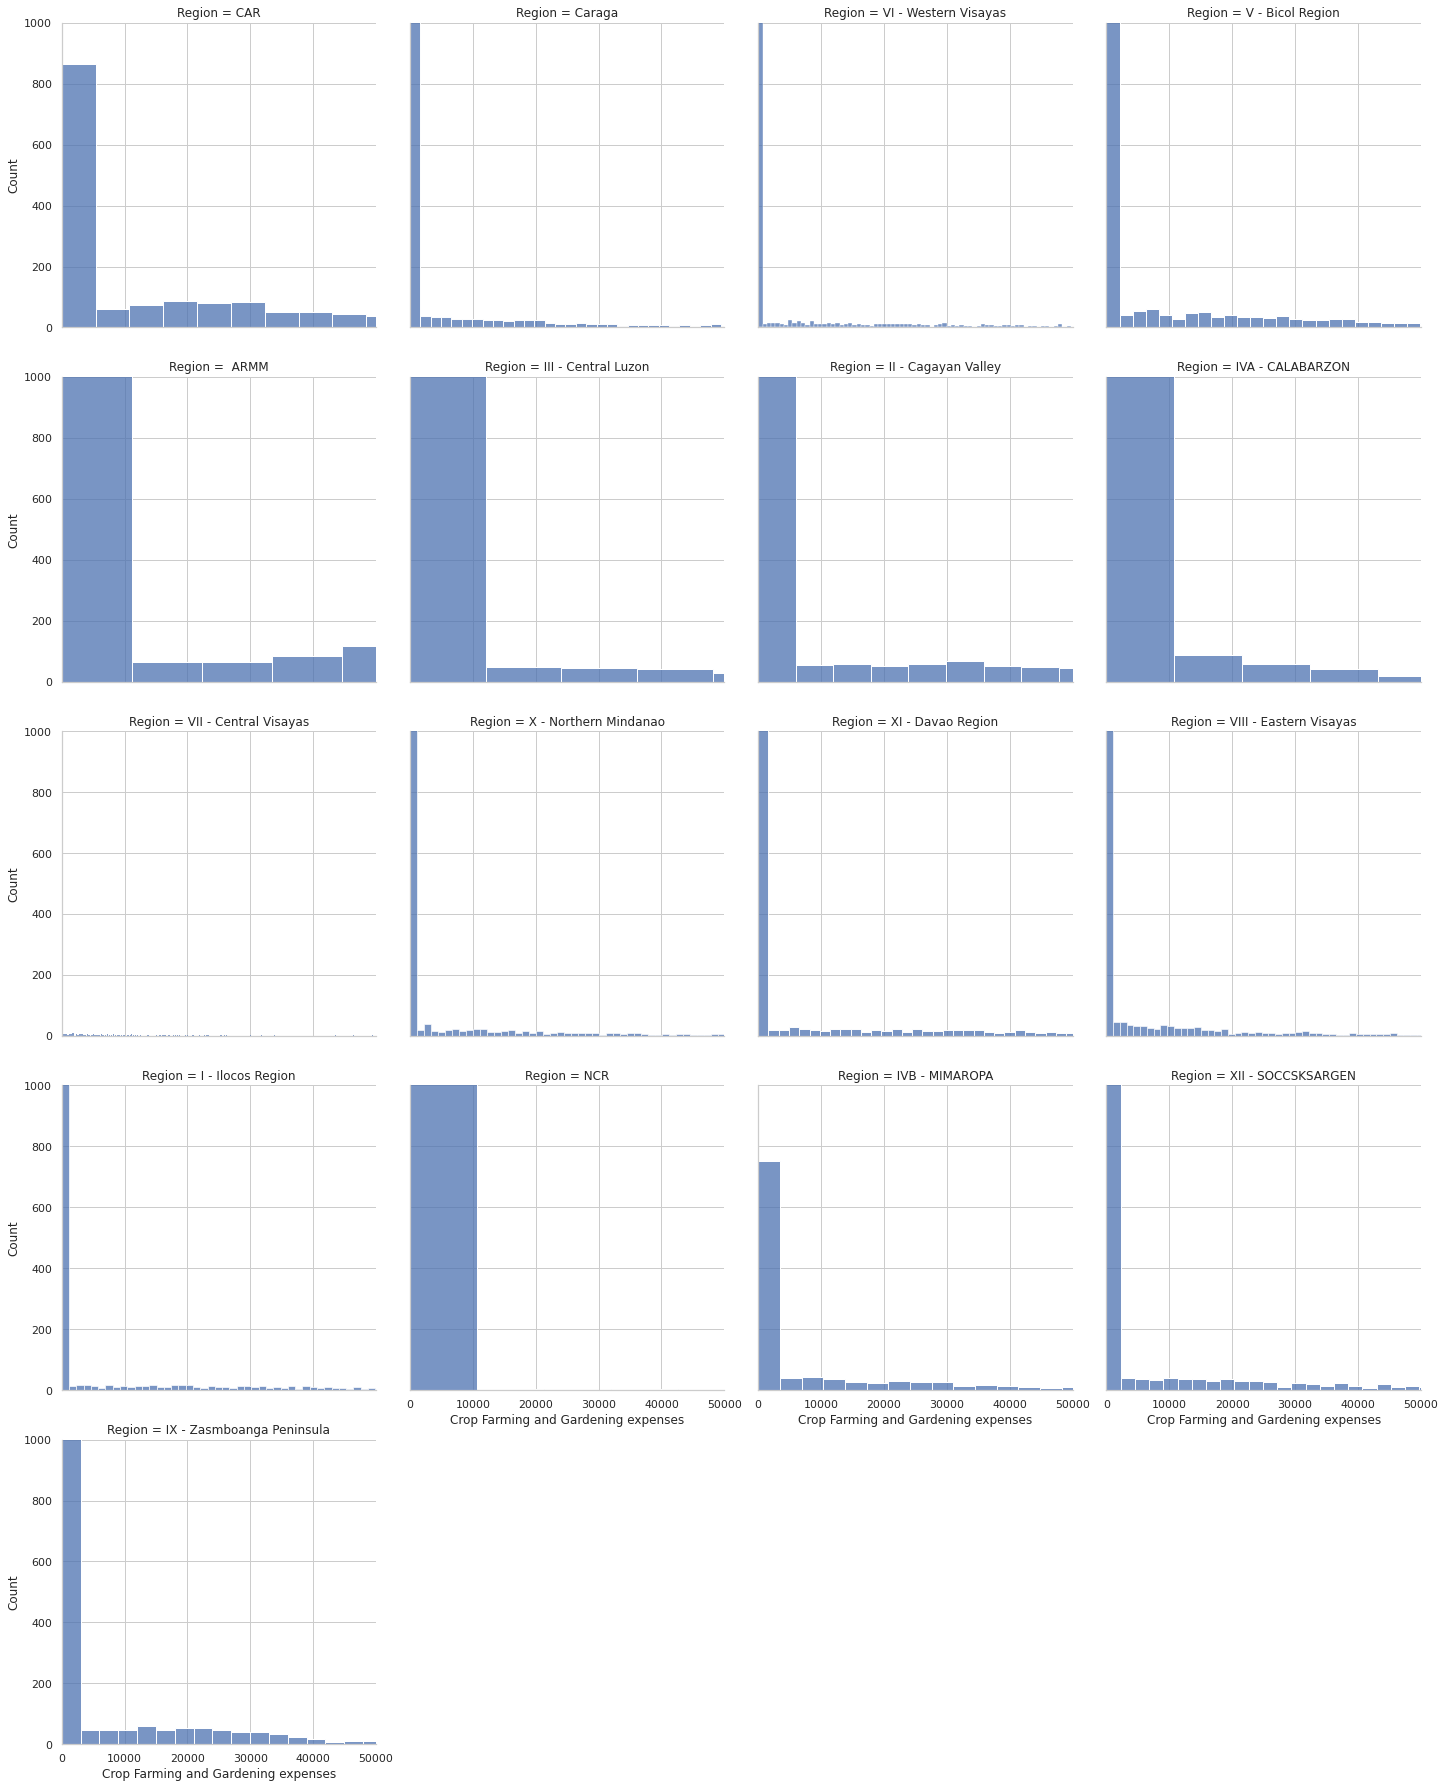

In [ ]:
g = sns.FacetGrid(data=data[cfge_filtered], col="Region", height=5, col_wrap=4, xlim=(0,50000), ylim = (0,1000))
g.map(sns.histplot, "Crop Farming and Gardening expenses")
g.set_axis_labels("Crop Farming and Gardening expenses", "Count")

From this graph, we still have the same observations as the previous graph. 

### Major Sources of Income that are Prominent in each Region

We also wanted to see if there was a difference in sources of income in each Region.

To do this, we made use of a FacetGrid, we used Region as our columns so that we can see which sources of income are prominent in each region, and used Main Source of Income as the y axis.

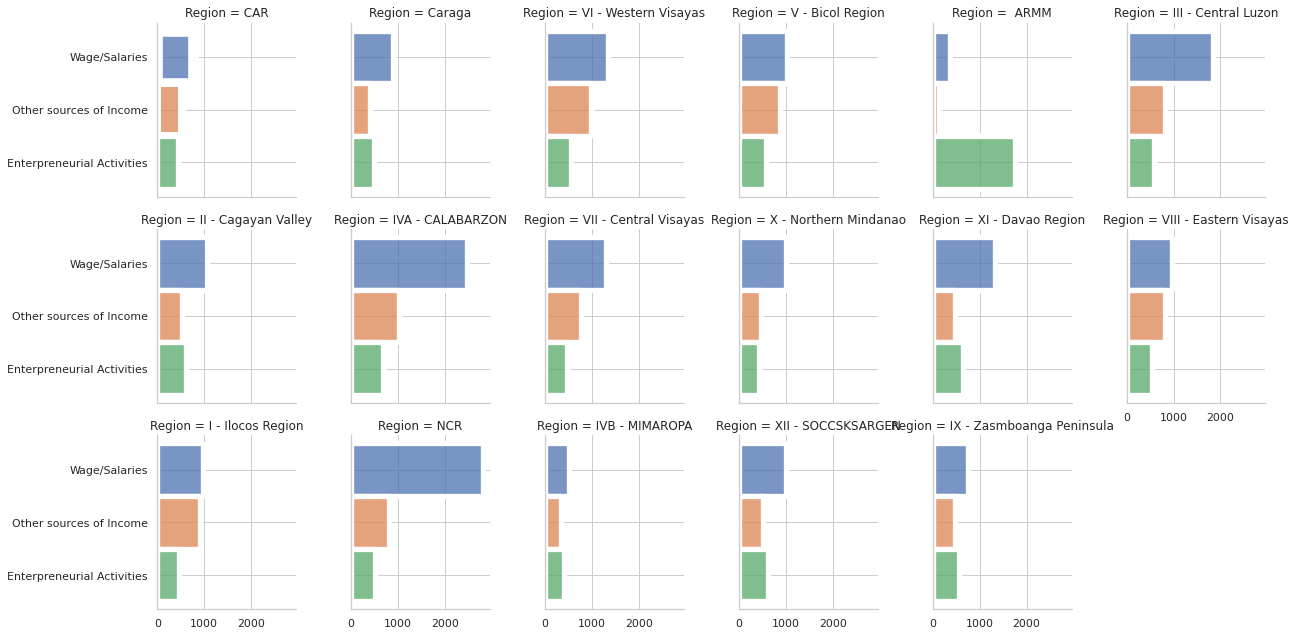

In [ ]:
g = sns.FacetGrid(data, col="Region", hue ="Main Source of Income", col_wrap = 6)
g.map_dataframe(sns.histplot, y="Main Source of Income", binwidth=2)


The graph shows the three sources of income: Wage/Salaries, Other sources of income, and Entrepreneural Activities, and their count per region. From the graph above, we made the following observations:


1.   Each region has a different distribution of sources of income, however, the most common distribution is Wage/Salaries with the highest count followed by Other Sources of income and Entrepreneural Activities as the least.
2.   ARMM stands out among the other regions because the most prominent source of income is Entrepreneural Activities whereas most of the other regions have Wage/Salaries as the most prominen source of income.
3. The most prominent source of income differs from region to region, but the most of the regions have Wage/Salaries as the most prominent source of income.



###  Which regions have the families with the highest incomes?

We wanted to compare the the region vs the income in order to see which regions have the families with the highest income. 

To start, we used a displt with `total_income_thousands` as the x axis and density as the y axis, we used Region as the hue and set kde to True for us to better see where each region falls.

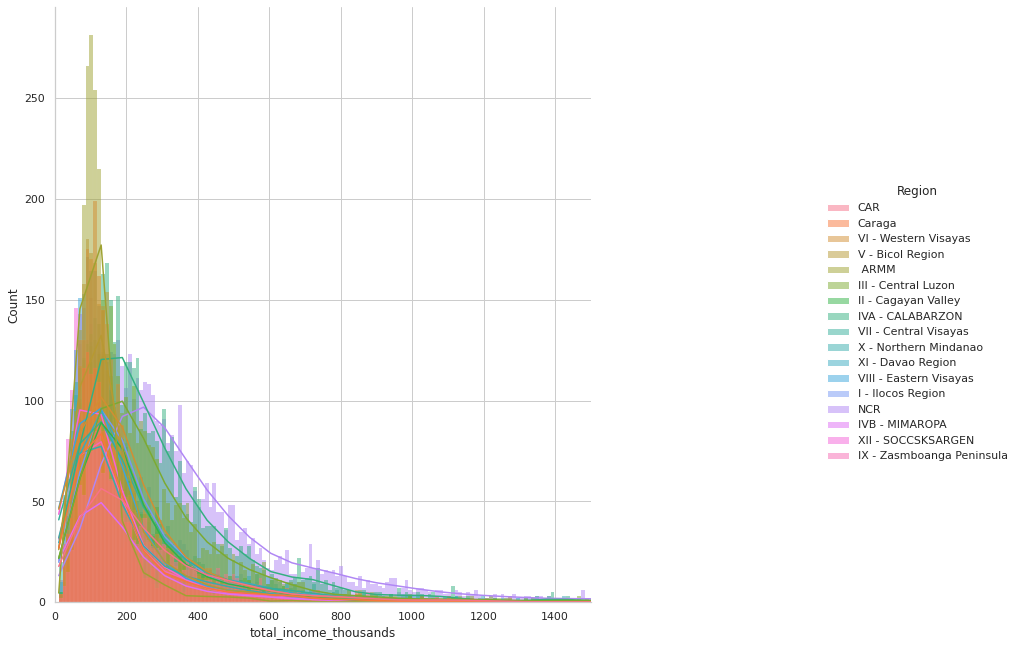

In [ ]:
reg_income_filtered_plot = sns.displot(data=data, x="total_income_thousands", hue="Region", kde = True)
reg_income_filtered_plot.set(xlim=(0, 1500))
reg_income_filtered_plot.fig.set_size_inches(15,10)

The graph is somewhat hard to understand since density does not directly translate to count. 

With that in mind, we created a new graph and used histplot instead with the same x axis and hue, but y axis is changed to count. We set the x limit to 1 and 1500 since all income are within this range.

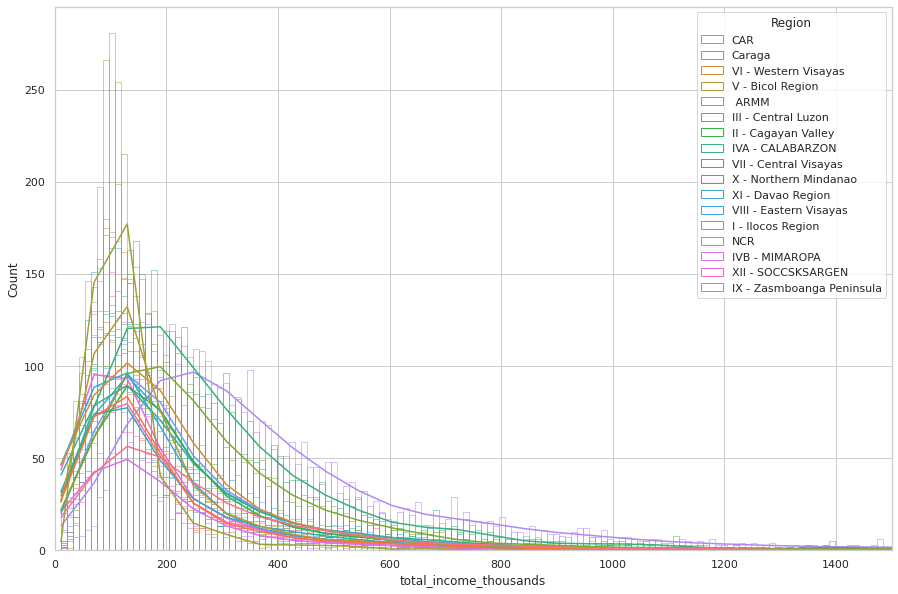

In [ ]:
reg_income_filtered_plot = sns.histplot(data=data, x="total_income_thousands", hue="Region", fill = False, kde = True)
reg_income_filtered_plot.set(xlim=(0, 1500))
reg_income_filtered_plot.figure.set_size_inches(15,10)

The graph shows the count of families with respect to the income and region. From this graph, we can observed the following:

1.   The peak of the regions is somewhere between 0 and 200, which means that most families have an income between 0 to php 200,000, regardless of their region
2.   As the income increases, the count decreases, however we can see that the curve of NCR is almost always above the others, which means that NCR has families who have high income.
3. The data can be better viewed if the x axis contained categorical values instead.

We decided to create a third graph to show Region vs Income. This time, we used a FacetGrid with Region as the column so that we can view each region individually. We used `Income Classification` as the x axis and count as the y axis and used a horizontal orientation for readability.



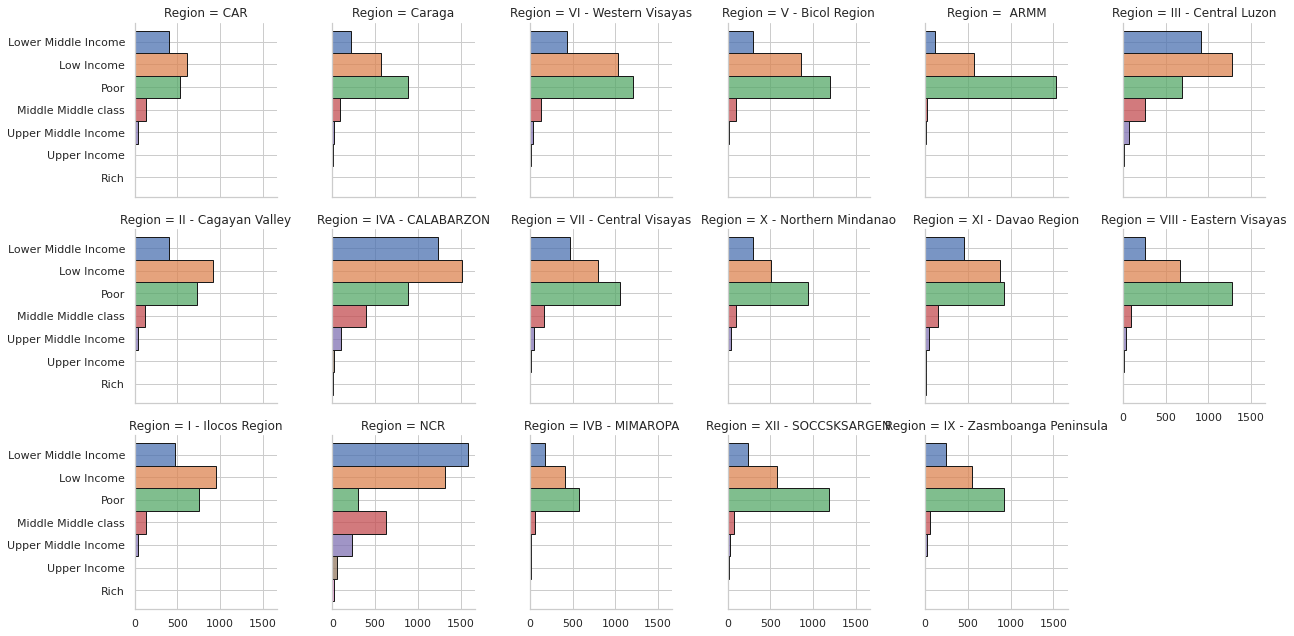

In [ ]:
g = sns.FacetGrid(data, col="Region", hue ="Income Classification", col_wrap = 6)
g.map_dataframe(sns.histplot, y="Income Classification", binwidth=2, edgecolor="k", linewidth=1)

The graph shows each region and the count of each Income Classification in the region, From this graph, we made the following observations:

1.   The distribution of the Income Classifications are different per region
2.   NCR is the region with the lowest number of families classified as Poor




### Which region has families with most expenses

We wanted to take a look at which region had the families with the most expenses. However, the expenses were subdivided in the dataframe, so first we needed to create a new variable called `total_expense`, this will be the sum of all the expenses per family. After getting the sum, we noticed that the expenses were in the range of thousands, with this we created a new variable called `total_expense_thousands`, which is the `total_expenses` divided by 1000, so that the graphs will be more readable. 



In [ ]:
data['total_expense'] = data['Total Food Expenditure'] + data['Bread and Cereals Expenditure'] + data['Total Rice Expenditure'] + data['Meat Expenditure'] + data['Total Fish and  marine products Expenditure'] + data['Fruit Expenditure'] + data['Vegetables Expenditure'] + data['Restaurant and hotels Expenditure'] + data['Alcoholic Beverages Expenditure'] + data['Tobacco Expenditure'] + data['Clothing, Footwear and Other Wear Expenditure'] + data['Housing and water Expenditure'] + data['Housing and water Expenditure'] + data['Imputed House Rental Value'] + data['Medical Care Expenditure'] + data['Transportation Expenditure'] + data['Communication Expenditure'] + data['Education Expenditure'] + data['Miscellaneous Goods and Services Expenditure'] + data['Special Occasions Expenditure'] + data['Crop Farming and Gardening expenses']
data['total_expense_thousands'] = data['total_expense']/1000
data.head()

Total Household Income Region  ...  total_expense total_expense_thousands
0                  480332    CAR  ...         529373                 529.373
1                  198235    CAR  ...         321970                 321.970
2                   82785    CAR  ...         199834                 199.834
3                  107589    CAR  ...         246909                 246.909
4                  189322    CAR  ...         330666                 330.666

[5 rows x 64 columns]

We made use of a displot to make a KDE (Kernel Density Estimation) with `total_expense_thousand` as the x axis, density as the y axis, and Region as the hue. 

This will show us the density of expenses per region.

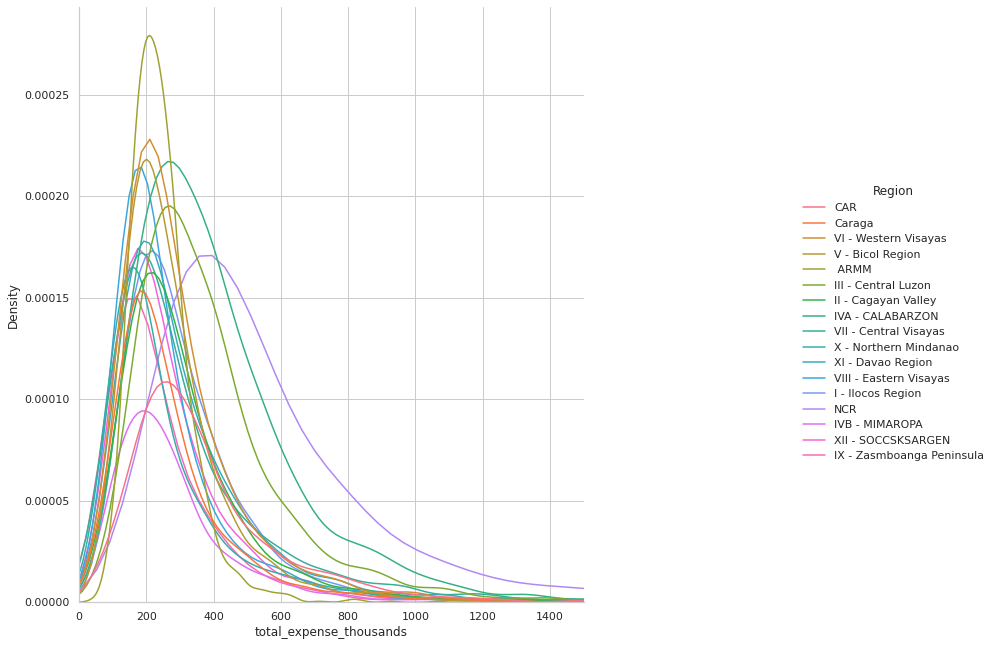

In [ ]:
reg_expense_filtered_plot = sns.displot(data=data, x="total_expense_thousands", hue="Region", kind = "kde")
reg_expense_filtered_plot.set(xlim=(0, 1500))
reg_expense_filtered_plot.fig.set_size_inches(15,10)

The graph shows us per interval in the x axis, how many in the population has this amount of expenses. We can see that in most regions, the peak is at 200, which indicates that throughout all regions, many families have a total expense of approximately Php 200,000. However, the y axis is hard to interpret since density does not show the count.

With this in mind, we created a new graph using histplot instead with `total_expense_thousands` as the x axis, count as the y axis and Region as the hue, we set kde to True so that the result will be more readable. We also set the x limit to 0 and 1500 since the data only reaches that range.

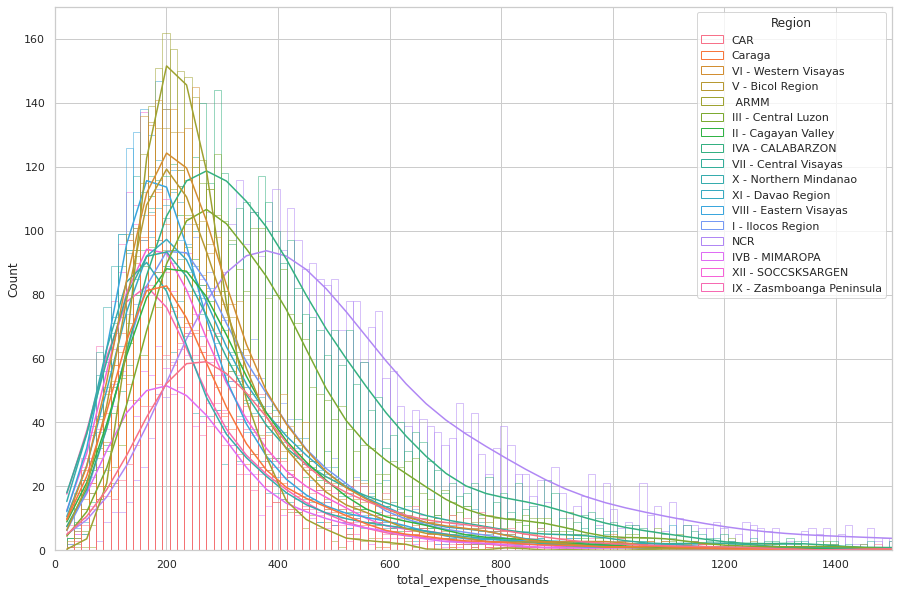

In [ ]:
reg_expense_filtered_plot = sns.histplot(data=data, x="total_expense_thousands", hue="Region", fill = False, kde = True)
reg_expense_filtered_plot.set(xlim=(0, 1500))
reg_expense_filtered_plot.figure.set_size_inches(15,10)

The new graph shows similar curves to the previous one, however this is more interpretable since the y axis has been changed to count instead of density. From this graph we made the following observations:


1.   Same as the previos graph, the peak is at 200, which indicates that throughout all regions, many families have a total expense of approximately Php 200,000. However, the y axis is hard to interpret since density does not show the count.
2.   The families with the highest expenses are in NCR. We can see that only a few families have expenses over Php 1,400,000 , but we can see that the line that represents NCR is above all the other regions at this point.



### Which major source of income provides the best for the expenses of a family?

We wanted to know which sources of income are enough to sustain the family's expenses, so we made several graphs to observe and compare the income and expenses of the families.


To start, we created a new variable in our dataframe called `income_minus_expense` which is the Total Household income minus the total expense. This variable will be used to see if the family's income is greater than their expense, then the value of income minus expense will be positive. A positive `income_minus_expense` indicates that the family is able to sustain themselves.


Since the values of both Total Household Income and Total Expense are within the range of thousands, we created another variable called `income_minus_expense_thousands`, which is the `income_minus_expense` divided by 1000. This will help us visualize the data better.




In [ ]:
data['income_minus_expense'] = data['Total Household Income'] - data['total_expense']
data['income_minus_expense_thousands'] = data['income_minus_expense']/1000
data.head()

Total Household Income  ... income_minus_expense_thousands
0                  480332  ...                        -49.041
1                  198235  ...                       -123.735
2                   82785  ...                       -117.049
3                  107589  ...                       -139.320
4                  189322  ...                       -141.344

[5 rows x 66 columns]

We created new dataframes called `positive_income`, `balanced_income`, and `negative_income` to store the data of the households with different net incomes. To do this, we filtered the `data` with the condition `income_minus_expense >= 0` for `positive_income`,`income_minus_expense == 0` for `balanced_income`, and `income_minus_expense < 0` for `negative_income` . This gives us dataframes that only contains the households who can sustain themselves, those who can barely sustain themselves, and those who cannot.

In [ ]:
positive_income = data[data.income_minus_expense >= 0]
balanced_income = data[data.income_minus_expense == 0]
negative_income = data[data.income_minus_expense < 0]
# positive_income.head()
# balanced_income.head()
# negative_income.head()

columns=["positive_count", "balanced_count", "negative_count"]
df = pd.DataFrame(columns=columns)
row = pd.Series([positive_income["income_minus_expense_thousands"].count(), balanced_income["income_minus_expense_thousands"].count(), negative_income["income_minus_expense_thousands"].count()])
row = pd.DataFrame([row])
df = pd.concat([row], ignore_index=True)
df.columns = columns
df.head()


# print(positive_income.shape)

positive_count  balanced_count  negative_count
0            3674               0           37870

We also wanted to have a brief overview of how many had a net positive income, how many had a balanced net income, and how many had a negative net income. To properly visualize this, we made this bar graph below to display the count of each. 

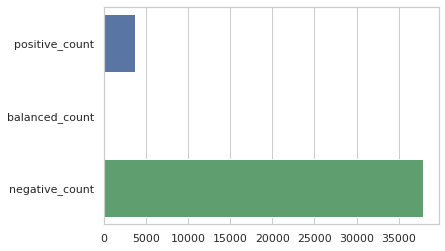

In [ ]:
income_minus_expense_plot = sns.barplot(orient="h", data=df)

Since we wanted to see which major source of income provides the best for the expenses of the family, we created a Categorical Plot called `reg_income_minus_expense_filtered_plot` , using the newly created `positive_income` dataframe, we set the Main Source of Income as the y axis and the count for the x axis, and set the orientation to horizonal for readability purposes. 

This gives us a bar graph with the Main Sources of Income categorized.  

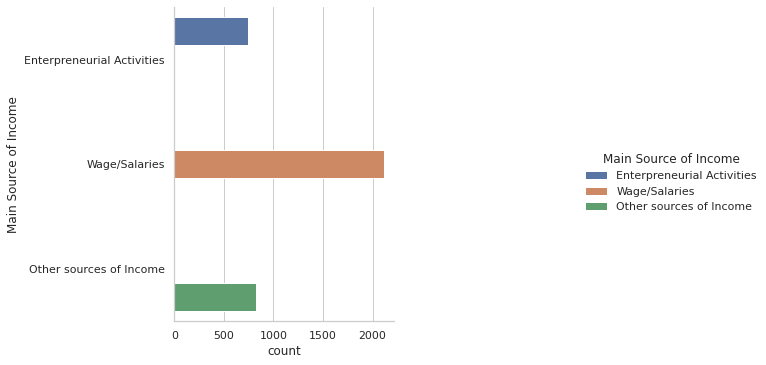

In [ ]:
reg_income_minus_expense_filtered_plot = sns.catplot(y="Main Source of Income", orient="h", hue="Main Source of Income", kind = "count", data=positive_income)
# reg_income_minus_expense_filtered_plot.set(xlim=(0, 1500))
reg_income_minus_expense_filtered_plot.fig.set_size_inches(15,5)

From the graph shown above, we can see that more than 2000 familes are able to sustain themselves. Majority of the familes that are able to sustain themselves have Wage/Salaries as their main income, while Entrepreneural Activities have the least count in families sustained. 

The graph shown above only shows the families that are able to sustain themselves, however, we are also curious about the families who are not sustained by their main source of income.

We then created a Categorical Plot called `reg_income_minus_expense_negative_filtered_plot` , using the the other created dataframe, the `negative_income`, we set the Main Source of Income as the y axis and the count for the x axis, and set the orientation to horizonal for readability purposes. 

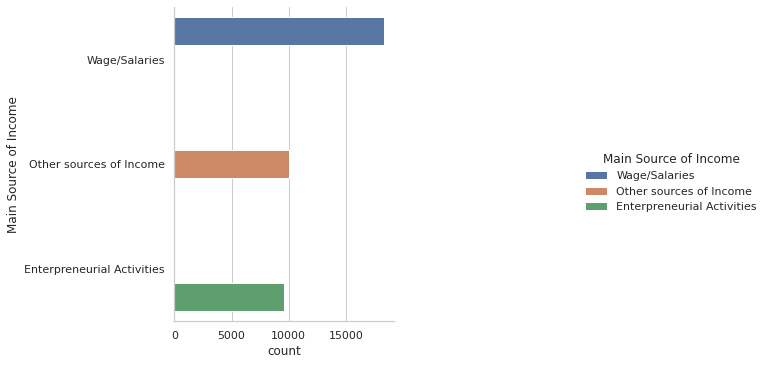

In [ ]:
reg_income_minus_expense_negative_filtered_plot = sns.catplot(y="Main Source of Income", orient="h", hue="Main Source of Income", kind = "count", data=negative_income)
# reg_income_minus_expense_filtered_plot.set(xlim=(0, 1500))
reg_income_minus_expense_negative_filtered_plot.fig.set_size_inches(15,5)


From the graph shown above, we can see that majority of the familes that are unable to sustain themselves have Wage/Salaries as their main income, while Entrepreneural Activities have the least count. 

The graph above only shows the distribution of the negative net income across the various main sources of income, we now want to know by how much are these families unable to support their expenses.


We created a new graph which focuses on the distribution of those with a net negative income. The graph, named `reg_income_minus_expense_negative_values_plot`, has `income_minus_expense_thousands` as it's x axis, and count as it's y axis. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


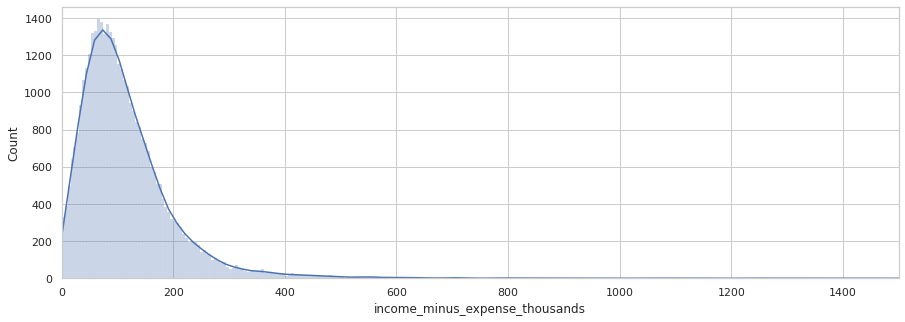

In [ ]:
abs_negative_income = negative_income
abs_negative_income["income_minus_expense"] = negative_income["income_minus_expense"].abs()
abs_negative_income["income_minus_expense_thousands"] = negative_income["income_minus_expense_thousands"].abs()
reg_income_minus_expense_negative_values_plot = sns.histplot(x="income_minus_expense_thousands", fill="false", kde="true", alpha=0.3, data=abs_negative_income)
reg_income_minus_expense_negative_values_plot.set(xlim=(0, 1500))
reg_income_minus_expense_negative_values_plot.figure.set_size_inches(15,5)


From the graph shown above, we can see that a majority of the families that have a net negative income, have around Php 100,000 to Php 200,000 that they cannot afford with their income. To get a better grasp of this, we then get the mean of the negative income as seen below.

In [ ]:
print(f'Mean of all excess expenses: {abs_negative_income["income_minus_expense"].mean()}')

Mean of all excess expenses: 116910.96202799049


After looking into the negative net inome, we then wanted to know the ratio of how many families are sustained and contrast it with how many are not sustained by ther main source of income. 

To do this, we created copies of `data`, and grouped the families accoring to their main source of income in order to get the count for each source of income. After that we computed the count of the positive `income_minus_expenses`, we then used this to get the percentage of the families that can sustain themselves per source of income.

In [ ]:
income_count = data
positive_income_count = positive_income

# income_count["Count per Source of Income"] = income_count.groupby("Main Source of Income").count()
income_count = income_count.groupby("Main Source of Income").count()
income_count = income_count.reset_index()
income_count["Count per Source of Income"] = income_count["Total Household Income"]
income_count = income_count.filter(["Main Source of Income", "Count per Source of Income"])

positive_income_count = positive_income_count.groupby("Main Source of Income").count()
positive_income_count = positive_income_count.reset_index()
positive_income_count["Count per Source of Income"] = positive_income_count["Total Household Income"]
positive_income_count = positive_income_count.filter(["Main Source of Income", "Count per Source of Income"])

income_count["Count per Source of Income"] = [i / j * 100 for i,j in zip(income_count['Count per Source of Income'], income_count['Count per Source of Income'])]
positive_income_count["Percentage per Source of Income"] = [i / j * 100 for i,j in zip(income_count['Count per Source of Income'], positive_income_count['Count per Source of Income'])]

# positive_income_count

We used a Stack Bar Chart in order to show the difference between the families that were capable of sustaining themselves and the families who were not capable.

To create the Stack Bar Chart, we first plotted using the total count per source of income. After that, we plotted the `positive_income_count`, which is the count of the families that are able to sustain themselves, using a lighter color. The graph shows in 100% of the source of income, what percentage of this can sustain themselves, and what percent can't.

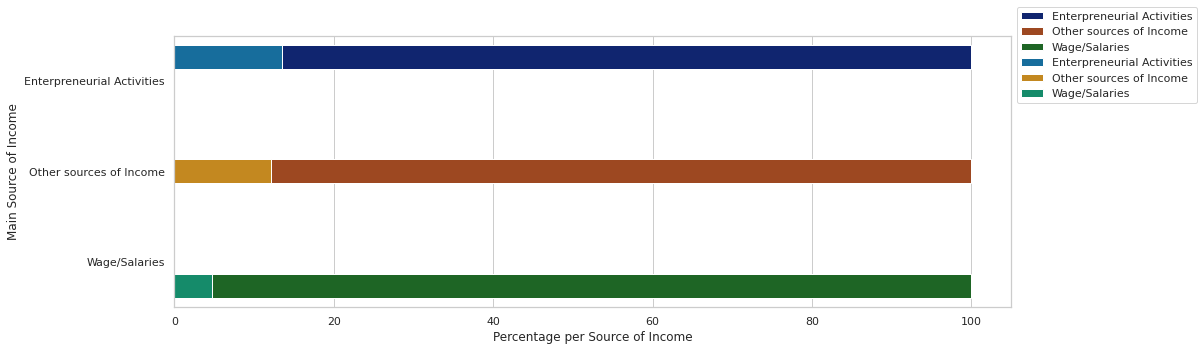

In [ ]:
plt.figure(figsize = (15,5))

income_count_plot = sns.barplot(x="Count per Source of Income", y="Main Source of Income", hue="Main Source of Income", palette="dark", data=income_count)

positive_income_count_plot = sns.barplot(x="Percentage per Source of Income", y="Main Source of Income", hue="Main Source of Income", palette="colorblind" ,data=positive_income_count)

# top_bar = mpatches.Patch(palette='dark', label='smoker = No')
# bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
# plt.legend(handles=[top_bar, bottom_bar], bbox_to_anchor=(1.2,1))
plt.legend(bbox_to_anchor=(1,0.73))

plt.show()

The graph shows what percent of the families can sustain themselves depending on the main source of income. Per source of income, the bar is split between the families that are able to sustain themselves as the lighter color, and the families that are not able to sustain themselves, which are represented by the darker colors.

From this graph, we can see that all three sources of income have less than 20% can sustain themselves. Comparing it to the above graph that only shows the count of the families that can sustain themselves, we saw that Wage/Salaries had the highest number of families sustained, however, in this graph, we can see that although among the three it had the largest count of sustained families, it does not apply to all families that use Wage/Salary as their main source of income. 